## Importing Libraries and datasets


###Importing Libraries 

In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')

import datetime as dt
from pprint import pprint
from itertools import chain
from collections import Counter
import plotly.express as px

# Natural Language Toolkit
import sklearn
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from sklearn.decomposition import NMF

from sklearn.metrics import f1_score, accuracy_score
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import NMF
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importing Datasets

In [3]:
#from google.colab import drive 
#drive.mount('/content/gdrive')
#google drive link with all datasets if needed  
# https://drive.google.com/drive/folders/1ToIRjF-VT8SCl23iVJ-kSK4zuIlRpB5F?usp=share_link

Mounted at /content/gdrive


In [4]:
total_tweets_list = []

In [5]:
df_FEB24= pd.read_csv("feb_sentiment_analysis_RoBERTa_raw_values.csv")
total_tweets_list.append(df_FEB24.shape[0])
df_FEB24 = df_FEB24[df_FEB24["language"] == "en"]
df_FEB24 = df_FEB24.iloc[0:60000,:]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,4,5,6,7,9,10,11,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_FEB24.shape[0]

60000

In [7]:
df_FEB24= df_FEB24[["userid","tweetcreatedts","text", "hashtags"]]

In [8]:
df_MAR24= pd.read_csv("UkraineCombinedTweetsDeduped_MAR24.csv",lineterminator='\n',low_memory= False)
total_tweets_list.append(df_MAR24.shape[0])
df_MAR24 = df_MAR24[df_MAR24["language"] == "en"]
df_MAR24 = df_MAR24.iloc[0:60000,:][["userid","tweetcreatedts","text", "hashtags"]]

In [9]:
df_APR7= pd.read_csv("UkraineCombinedTweetsDeduped_APR07.csv",lineterminator='\n',low_memory= False)
total_tweets_list.append(df_APR7.shape[0])
df_APR7 = df_APR7[df_APR7["language"] == "en"]
df_APR7 = df_APR7.iloc[0:60000,:][["userid","tweetcreatedts","text", "hashtags"]]

In [10]:
df_JUL4= pd.read_csv("0704_UkraineCombinedTweetsDeduped_JUL04.csv",lineterminator='\n',low_memory= False)
total_tweets_list.append(df_JUL4.shape[0])
df_JUL4 = df_JUL4[df_JUL4["language"] == "en"]
df_JUL4 = df_JUL4.iloc[0:60000,:][["userid","tweetcreatedts","text", "hashtags"]]

In [11]:
df_AUG25= pd.read_csv("0825_UkraineCombinedTweetsDeduped.csv",lineterminator='\n',low_memory= False)
total_tweets_list.append(df_AUG25.shape[0])
df_AUG25 = df_AUG25[df_AUG25["language"] == "en"][["userid","tweetcreatedts","text", "hashtags"]]

In [12]:
tweets_merged = df_FEB24.append([df_MAR24, df_APR7,df_JUL4,df_AUG25],ignore_index=True)

In [13]:
tweets_merged.shape

(268265, 4)

In [14]:
data= tweets_merged

In [15]:
data

userid              tweetcreatedts  \
0                 962369743  2022-02-24 06:48:02.000000   
1                1073676020  2022-02-24 06:48:02.000000   
2       1040140500718837760  2022-02-24 06:48:03.000000   
3                3821643918  2022-02-24 06:48:03.000000   
4       1075087352983216128  2022-02-24 06:48:03.000000   
...                     ...                         ...   
268260  1498275632471580673         2022-08-25 23:59:35   
268261  1514851881478238213         2022-08-25 23:59:39   
268262             21729540         2022-08-25 23:59:43   
268263  1434594980148961280         2022-08-25 23:59:48   
268264            600352663         2022-08-25 23:59:50   

                                                     text  \
0       Footage of the airport bombing in Ivano-Franki...   
1       Ukraine MP Sophia Fedyna tells about the groun...   
2       A cruise missile fired by the Russian army fel...   
3       SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain...   
4       Footage of the airport bombing in Ivano-Franki...   
...                                                   ...   
268260  @BeKindReWine @AnonOpsSE Oh yea, forgot to men...   
268261  A little dose of reality. #Biden's Executive O...   
268262  Authorities of Zaporizhzhia discuss evacuation...   
268263  this mf’s are legitimaly wiping their own debt...   
268264         Not good! #Ukraine https://t.co/baxiSHq99Z   

                                                 hashtags  
0       [{'text': 'Ukraine', 'indices': [68, 76]}, {'t...  
1            [{'text': 'ITVideo', 'indices': [130, 138]}]  
2       [{'text': 'Ukraine', 'indices': [72, 80]}, {'t...  
3       [{'text': 'Ukraine', 'indices': [55, 63]}, {'t...  
4       [{'text': 'Ukraine', 'indices': [68, 76]}, {'t...  
...                                                   ...  
268260  [{'text': 'RussiaIsATerroristState', 'indices'...  
268261           [{'text': 'Biden', 'indices': [26, 32]}]  
268262  [{'text': 'UkraineRussiaWar', 'indices': [139,...  
268263  [{'text': 'PPPLoanForgiveness', 'indices': [10...  
268264         [{'text': 'Ukraine', 'indices': [10, 18]}]  

[268265 rows x 4 columns]

In [16]:
df_tweet=pd.concat([data['userid'], data['text'],data['tweetcreatedts']],axis=1)
df_tweet

userid  \
0                 962369743   
1                1073676020   
2       1040140500718837760   
3                3821643918   
4       1075087352983216128   
...                     ...   
268260  1498275632471580673   
268261  1514851881478238213   
268262             21729540   
268263  1434594980148961280   
268264            600352663   

                                                     text  \
0       Footage of the airport bombing in Ivano-Franki...   
1       Ukraine MP Sophia Fedyna tells about the groun...   
2       A cruise missile fired by the Russian army fel...   
3       SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain...   
4       Footage of the airport bombing in Ivano-Franki...   
...                                                   ...   
268260  @BeKindReWine @AnonOpsSE Oh yea, forgot to men...   
268261  A little dose of reality. #Biden's Executive O...   
268262  Authorities of Zaporizhzhia discuss evacuation...   
268263  this mf’s are legitimaly wiping their own debt...   
268264         Not good! #Ukraine https://t.co/baxiSHq99Z   

                    tweetcreatedts  
0       2022-02-24 06:48:02.000000  
1       2022-02-24 06:48:02.000000  
2       2022-02-24 06:48:03.000000  
3       2022-02-24 06:48:03.000000  
4       2022-02-24 06:48:03.000000  
...                            ...  
268260         2022-08-25 23:59:35  
268261         2022-08-25 23:59:39  
268262         2022-08-25 23:59:43  
268263         2022-08-25 23:59:48  
268264         2022-08-25 23:59:50  

[268265 rows x 3 columns]

In [18]:
reddit = pd.read_excel('Part_2-Reddit_news.xlsx')
df_re=pd.DataFrame(np.array(reddit['comment']), columns=['text'])
df_re

text
0     Jesus fuck, the Ukrainian ambassador just aske...
1     Russian ambassador:  I don't know about this d...
2     Ukraine Representative at the UN right now "I ...
3     "This isn't called a war...this is a military ...
4     This asshole representing Russia at the UN lit...
...                                                 ...
3612  Putin, Lavarov and other Russian State represe...
3613             I think it was Russian blood, not men.
3614  The geopolitical knowledge of reddit is concer...
3615  Ironically, banning you seems to be the most a...
3616  The version I'm familiar with is "the British ...

[3617 rows x 1 columns]

In [19]:
#importing a pro russian tweets dataset
df_pro_russia =pd.read_csv("support_russia_tweets.csv",lineterminator='\n')
#data_russia=pd.read_csv("nov.csv",lineterminator='\n')

df_pro_russia = df_pro_russia.rename(columns={'Tweet': 'text'})
df_pro_russia =pd.concat([df_pro_russia['User'], df_pro_russia['text']],axis=1)
df_pro_russia.head()

User                                               text
0  Caveman2200  Just another direct hit on those Nazis in Ukra...
1     Sepp0073  #IStandWithPutin #StopPutinNOW #stopputin #Sto...
2   Lydasoraus  I've said it from the beginning. The Russians ...
3  Caveman2200  Again .... just more strikes all over #Ukraine...
4  Caveman2200  Nother round of massive strikes in #Ukraine #U...

In [20]:
#importing zelensky war criminal dataset
data_russia_zelenskywarcriminal=pd.read_csv("zelenskywarcriminal.csv",lineterminator='\n')

# PART 2

## Text Cleaning 

In [21]:
#clean data using the same data-cleaning scheme as part 1
def parser(text):
  """
    removes html tags and attributes using beautifulSoup html.parser,
    returns output as text
  """
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

def normalize(text):
  """
    normalizes unicode character to regular text
  """
  # read ascii characters using NFKD method, then decode back to string
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
  return text

def remove_URL(text):
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'www\S+', '', text)
    return(text)

def remove_mentions(text):
    
    #for usernames with two "_"
    text = re.sub(r'@[A-Za-z0-9]+_[A-Za-z0-9]+_[A-Za-z0-9]+','',text) 
    
    #for usernames with one "_"
    text = re.sub(r'@[A-Za-z0-9]+_[A-Za-z0-9]+','',text)
    
    #for usernames with no "_"
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    
    return text

def remove_spaces(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'-','',text)
    
    return text

def remove_nonletter(text):
    """
    removes any item that is not in the a-z or A-Z
    """
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    return text

In [22]:
# perform lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
    words_in_each_tweet = word_tokenize(text)
    final = [lemmatizer.lemmatize(word) for word in words_in_each_tweet]
    lemmatized_tweets = ' '.join(final)
    return lemmatized_tweets

In [23]:
def text_clean(df):
    tweet_text_lower = (df['text']).astype(str).str.lower()
    
    tweet_text_cleaned = tweet_text_lower.apply(parser)
    tweet_text_cleaned = tweet_text_cleaned.apply(normalize)
    tweet_text_cleaned = tweet_text_cleaned.apply(remove_URL)
    tweet_text_cleaned = tweet_text_cleaned.apply(remove_mentions)
    tweet_text_cleaned = tweet_text_cleaned.apply(remove_spaces)
    tweet_text_cleaned = tweet_text_cleaned.apply(remove_nonletter)
    
    df_tweet1 = pd.concat([df,tweet_text_cleaned], axis=1)
    df_tweet1.columns.values[-1]='cleaned_text'
    
    # define set of nltk stopwords
    stop_words = set(stopwords.words('english'))

    stop_words.add("i'm")
    stop_words.add("they're")
    stop_words.add("thats")
    stop_words.add("tho")
    stop_words.add("also")
    
    # create new column for tweet without stop words
    df_tweet1['tweets_without_stopwords'] = df_tweet1['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
 
    df_tweet1['tweets_with_lemmer'] = df_tweet1['tweets_without_stopwords'].apply(lemmatizing)
    df_tweet2=pd.DataFrame(np.array(df_tweet1), columns=df_tweet1.columns)
    
    return df_tweet2

In [24]:
df_tweets=text_clean(df_tweet)
df_tweets.head()

userid                                               text  \
0            962369743  Footage of the airport bombing in Ivano-Franki...   
1           1073676020  Ukraine MP Sophia Fedyna tells about the groun...   
2  1040140500718837760  A cruise missile fired by the Russian army fel...   
3           3821643918  SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain...   
4  1075087352983216128  Footage of the airport bombing in Ivano-Franki...   

               tweetcreatedts  \
0  2022-02-24 06:48:02.000000   
1  2022-02-24 06:48:02.000000   
2  2022-02-24 06:48:03.000000   
3  2022-02-24 06:48:03.000000   
4  2022-02-24 06:48:03.000000   

                                        cleaned_text  \
0  footage of the airport bombing in ivanofrankiv...   
1  ukraine mp sophia fedyna tells about the groun...   
2  a cruise missile fired by the russian army fel...   
3  spread and share  you can help ukraine  ukrain...   
4  footage of the airport bombing in ivanofrankiv...   

                            tweets_without_stopwords  \
0  footage airport bombing ivanofrankivsk ukraine...   
1  ukraine mp sophia fedyna tells ground situatio...   
2  cruise missile fired russian army fell kiev uk...   
3           spread share help ukraine ukraine russia   
4  footage airport bombing ivanofrankivsk ukraine...   

                                  tweets_with_lemmer  
0  footage airport bombing ivanofrankivsk ukraine...  
1  ukraine mp sophia fedyna tell ground situation...  
2  cruise missile fired russian army fell kiev uk...  
3           spread share help ukraine ukraine russia  
4  footage airport bombing ivanofrankivsk ukraine...

In [25]:
df_reddit=text_clean(df_re)
df_reddit.head()

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://www.reddit.com/r/ukraine/comments/t04wvg/anyone\_in\_kharkiv\_who\_is\_thinking\_of\_fleeing\_west/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://twitter.com/militarylandnet/status/1496698245875212295" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://twitter.com/global\_mil\_info/status/1496685438903463941?cxt=hhwwisc55clepcupaaaa" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like reques

text  \
0  Jesus fuck, the Ukrainian ambassador just aske...   
1  Russian ambassador:  I don't know about this d...   
2  Ukraine Representative at the UN right now "I ...   
3  "This isn't called a war...this is a military ...   
4  This asshole representing Russia at the UN lit...   

                                        cleaned_text  \
0  jesus fuck  the ukrainian ambassador just aske...   
1  russian ambassador  i don t know about this de...   
2  ukraine representative at the un right now  i ...   
3   this isn t called a war this is a military op...   
4  this asshole representing russia at the un lit...   

                            tweets_without_stopwords  \
0  jesus fuck ukrainian ambassador asked russia r...   
1  russian ambassador know declaration war war sp...   
2  ukraine representative un right going ask russ...   
3  called war military operation donbas russian a...   
4  asshole representing russia un literally audac...   

                                  tweets_with_lemmer  
0  jesus fuck ukrainian ambassador asked russia r...  
1  russian ambassador know declaration war war sp...  
2  ukraine representative un right going ask russ...  
3  called war military operation donbas russian a...  
4  asshole representing russia un literally audac...

In [26]:
df_prorussia_clean = text_clean(df_pro_russia)
df_prorussia_clean.head()

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://t.co/kn2ixabuen
トルコの銀行に対する「前例のない」米国の圧力がミールの支払いシステムを妨げている：クレムリン
米国財務省は、ロシア連邦の領土外でmirナショナル・ペイメント・システムの使用を拡大することで、ロシアの努力を支援するリスクがあると言っている
#istandwithrussia" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


User                                               text  \
0  Caveman2200  Just another direct hit on those Nazis in Ukra...   
1     Sepp0073  #IStandWithPutin #StopPutinNOW #stopputin #Sto...   
2   Lydasoraus  I've said it from the beginning. The Russians ...   
3  Caveman2200  Again .... just more strikes all over #Ukraine...   
4  Caveman2200  Nother round of massive strikes in #Ukraine #U...   

                                        cleaned_text  \
0  just another direct hit on those nazis in ukra...   
1   istandwithputin  stopputinnow  stopputin  sto...   
2  i ve said it from the beginning  the russians ...   
3  again   just more strikes all over  ukraine th...   
4  nother round of massive strikes in  ukraine  u...   

                            tweets_without_stopwords  \
0  another direct hit nazis ukraine zelenskywarcr...   
1  istandwithputin stopputinnow stopputin stoprus...   
2  said beginning russians good guys istandwithru...   
3  strikes ukraine morning ukrainewar zelenskywar...   
4  nother round massive strikes ukraine ukrainewa...   

                                  tweets_with_lemmer  
0  another direct hit nazi ukraine zelenskywarcri...  
1  istandwithputin stopputinnow stopputin stoprus...  
2   said beginning russian good guy istandwithrussia  
3  strike ukraine morning ukrainewar zelenskywarc...  
4  nother round massive strike ukraine ukrainewar...

## Testing VADER model (Valence Aware Dictionary and sEntiment Reasoner)

In [27]:
def vader(df):
    sid = SentimentIntensityAnalyzer()
    res = [*df['tweets_with_lemmer'].apply(sid.polarity_scores)]
    sentiment_df = pd.DataFrame.from_records(res)
    news = pd.concat([df, sentiment_df["compound"]], axis=1, join='inner')
    
    #THRESHOLD = 0.05

    conditions = [
        (news['compound'] < 0),
        (news['compound'] >= 0)
    ]

    values = ["neg", "pos"]
    news['label_pred'] = np.select(conditions, values)

    return news

In [28]:
vader_tweets = vader(df_tweets)
vader_tweets.head()

userid                                               text  \
0            962369743  Footage of the airport bombing in Ivano-Franki...   
1           1073676020  Ukraine MP Sophia Fedyna tells about the groun...   
2  1040140500718837760  A cruise missile fired by the Russian army fel...   
3           3821643918  SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain...   
4  1075087352983216128  Footage of the airport bombing in Ivano-Franki...   

               tweetcreatedts  \
0  2022-02-24 06:48:02.000000   
1  2022-02-24 06:48:02.000000   
2  2022-02-24 06:48:03.000000   
3  2022-02-24 06:48:03.000000   
4  2022-02-24 06:48:03.000000   

                                        cleaned_text  \
0  footage of the airport bombing in ivanofrankiv...   
1  ukraine mp sophia fedyna tells about the groun...   
2  a cruise missile fired by the russian army fel...   
3  spread and share  you can help ukraine  ukrain...   
4  footage of the airport bombing in ivanofrankiv...   

                            tweets_without_stopwords  \
0  footage airport bombing ivanofrankivsk ukraine...   
1  ukraine mp sophia fedyna tells ground situatio...   
2  cruise missile fired russian army fell kiev uk...   
3           spread share help ukraine ukraine russia   
4  footage airport bombing ivanofrankivsk ukraine...   

                                  tweets_with_lemmer  compound label_pred  
0  footage airport bombing ivanofrankivsk ukraine...    0.0000        pos  
1  ukraine mp sophia fedyna tell ground situation...    0.1280        pos  
2  cruise missile fired russian army fell kiev uk...   -0.5574        neg  
3           spread share help ukraine ukraine russia    0.5994        pos  
4  footage airport bombing ivanofrankivsk ukraine...    0.0000        pos

In [29]:
vader_reddit =vader(df_reddit)
vader_reddit.head()

text  \
0  Jesus fuck, the Ukrainian ambassador just aske...   
1  Russian ambassador:  I don't know about this d...   
2  Ukraine Representative at the UN right now "I ...   
3  "This isn't called a war...this is a military ...   
4  This asshole representing Russia at the UN lit...   

                                        cleaned_text  \
0  jesus fuck  the ukrainian ambassador just aske...   
1  russian ambassador  i don t know about this de...   
2  ukraine representative at the un right now  i ...   
3   this isn t called a war this is a military op...   
4  this asshole representing russia at the un lit...   

                            tweets_without_stopwords  \
0  jesus fuck ukrainian ambassador asked russia r...   
1  russian ambassador know declaration war war sp...   
2  ukraine representative un right going ask russ...   
3  called war military operation donbas russian a...   
4  asshole representing russia un literally audac...   

                                  tweets_with_lemmer  compound label_pred  
0  jesus fuck ukrainian ambassador asked russia r...   -0.5423        neg  
1  russian ambassador know declaration war war sp...   -0.5106        neg  
2  ukraine representative un right going ask russ...   -0.4215        neg  
3  called war military operation donbas russian a...   -0.4019        neg  
4  asshole representing russia un literally audac...   -0.2960        neg

In [30]:
vader_prorussia =vader(df_prorussia_clean)
vader_prorussia.head()

User                                               text  \
0  Caveman2200  Just another direct hit on those Nazis in Ukra...   
1     Sepp0073  #IStandWithPutin #StopPutinNOW #stopputin #Sto...   
2   Lydasoraus  I've said it from the beginning. The Russians ...   
3  Caveman2200  Again .... just more strikes all over #Ukraine...   
4  Caveman2200  Nother round of massive strikes in #Ukraine #U...   

                                        cleaned_text  \
0  just another direct hit on those nazis in ukra...   
1   istandwithputin  stopputinnow  stopputin  sto...   
2  i ve said it from the beginning  the russians ...   
3  again   just more strikes all over  ukraine th...   
4  nother round of massive strikes in  ukraine  u...   

                            tweets_without_stopwords  \
0  another direct hit nazis ukraine zelenskywarcr...   
1  istandwithputin stopputinnow stopputin stoprus...   
2  said beginning russians good guys istandwithru...   
3  strikes ukraine morning ukrainewar zelenskywar...   
4  nother round massive strikes ukraine ukrainewa...   

                                  tweets_with_lemmer  compound label_pred  
0  another direct hit nazi ukraine zelenskywarcri...    0.0000        pos  
1  istandwithputin stopputinnow stopputin stoprus...    0.0000        pos  
2   said beginning russian good guy istandwithrussia    0.4404        pos  
3  strike ukraine morning ukrainewar zelenskywarc...   -0.1280        neg  
4  nother round massive strike ukraine ukrainewar...   -0.1280        neg

pos    152249
neg    116016
Name: label_pred, dtype: int64


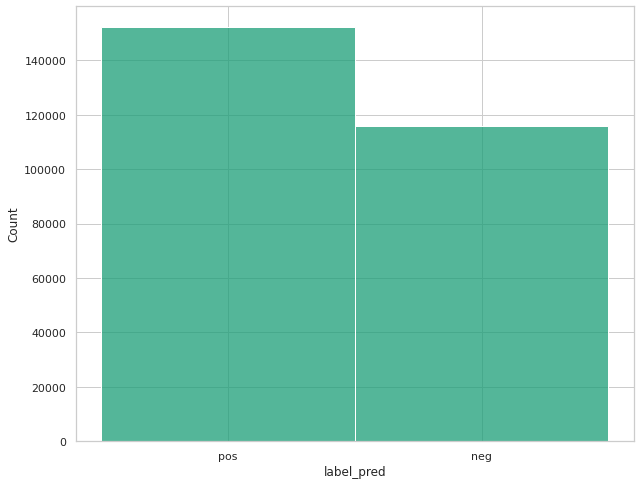

In [31]:
print(vader_tweets['label_pred'].value_counts())
sns.histplot(vader_tweets['label_pred'])

pos    1885
neg    1732
Name: label_pred, dtype: int64


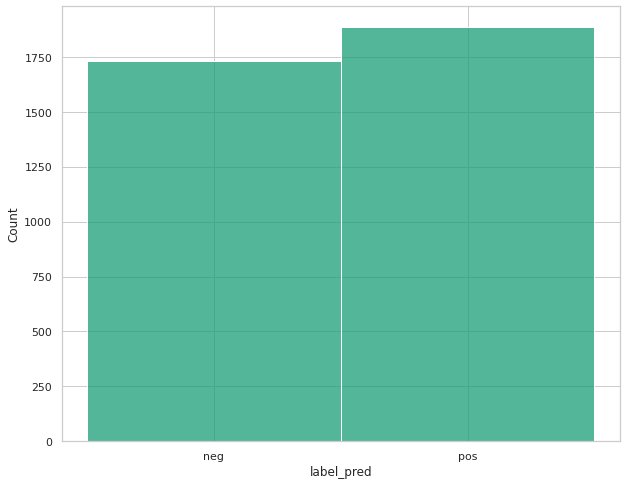

In [32]:
print(vader_reddit['label_pred'].value_counts())
sns.histplot(vader_reddit['label_pred'])

pos    3969
neg     897
Name: label_pred, dtype: int64


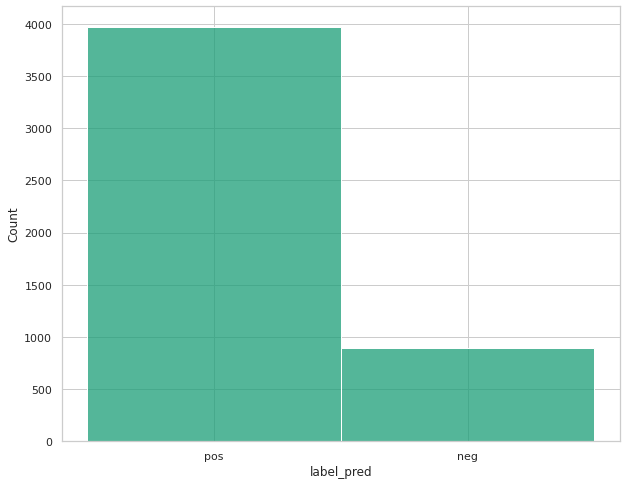

In [33]:
print(vader_prorussia['label_pred'].value_counts())
sns.histplot(vader_prorussia['label_pred'])

## Part 1 Model Testing 

In [34]:
# TF-IDF vectorizer to create a 1D vector for each tweet
def TIIDF(df):
    tweet_data_cleaned = df.tweets_with_lemmer
    tfidf_vectorizer = TfidfVectorizer(max_features = 600,
                                      norm = 'l2',
                                      use_idf = True,
                                      smooth_idf = True)


    tfidf_vec = tfidf_vectorizer.fit_transform(tweet_data_cleaned.values.astype('U'))
    tfidf_array = tfidf_vec.toarray()

    # encodes tweet data
    TFIDF_features = pd.DataFrame(data=tfidf_array, columns = tfidf_vectorizer.get_feature_names_out())
    
    return TFIDF_features

In [35]:
tiidf_tweet=TIIDF(df_tweets)
tiidf_tweet.head()

able  according  act  action  address  aggression  ago  agreement  aid  \
0   0.0        0.0  0.0     0.0      0.0         0.0  0.0        0.0  0.0   
1   0.0        0.0  0.0     0.0      0.0         0.0  0.0        0.0  0.0   
2   0.0        0.0  0.0     0.0      0.0         0.0  0.0        0.0  0.0   
3   0.0        0.0  0.0     0.0      0.0         0.0  0.0        0.0  0.0   
4   0.0        0.0  0.0     0.0      0.0         0.0  0.0        0.0  0.0   

   air  ...  worldwar  worth  would   ww  wwiii  year  yesterday  yet  \
0  0.0  ...       0.0    0.0    0.0  0.0    0.0   0.0        0.0  0.0   
1  0.0  ...       0.0    0.0    0.0  0.0    0.0   0.0        0.0  0.0   
2  0.0  ...       0.0    0.0    0.0  0.0    0.0   0.0        0.0  0.0   
3  0.0  ...       0.0    0.0    0.0  0.0    0.0   0.0        0.0  0.0   
4  0.0  ...       0.0    0.0    0.0  0.0    0.0   0.0        0.0  0.0   

   zelensky  zelenskyy  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
3       0.0        0.0  
4       0.0        0.0  

[5 rows x 600 columns]

In [36]:
tiidf_reddit=TIIDF(df_reddit)
tiidf_reddit.head()

abc  able  absolute  absolutely  according  account  across  act  action  \
0  0.0   0.0       0.0         0.0        0.0      0.0     0.0  0.0     0.0   
1  0.0   0.0       0.0         0.0        0.0      0.0     0.0  0.0     0.0   
2  0.0   0.0       0.0         0.0        0.0      0.0     0.0  0.0     0.0   
3  0.0   0.0       0.0         0.0        0.0      0.0     0.0  0.0     0.0   
4  0.0   0.0       0.0         0.0        0.0      0.0     0.0  0.0     0.0   

   actual  ...  would  wrong  wtf   ww  yeah  year  yes  yet  youre  youtube  
0     0.0  ...    0.0    0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0      0.0  
1     0.0  ...    0.0    0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0      0.0  
2     0.0  ...    0.0    0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0      0.0  
3     0.0  ...    0.0    0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0      0.0  
4     0.0  ...    0.0    0.0  0.0  0.0   0.0   0.0  0.0  0.0    0.0      0.0  

[5 rows x 600 columns]

In [37]:
tiidf_pro_russia=TIIDF(df_prorussia_clean)
tiidf_pro_russia.head()

abolishnato  accessed  account  action  actually  afforded  afghanistan  \
0          0.0       0.0      0.0     0.0       0.0       0.0          0.0   
1          0.0       0.0      0.0     0.0       0.0       0.0          0.0   
2          0.0       0.0      0.0     0.0       0.0       0.0          0.0   
3          0.0       0.0      0.0     0.0       0.0       0.0          0.0   
4          0.0       0.0      0.0     0.0       0.0       0.0          0.0   

   africa  african  agree  ...   ya  year  yes  yet  zelenski  zelensky  \
0     0.0      0.0    0.0  ...  0.0   0.0  0.0  0.0       0.0       0.0   
1     0.0      0.0    0.0  ...  0.0   0.0  0.0  0.0       0.0       0.0   
2     0.0      0.0    0.0  ...  0.0   0.0  0.0  0.0       0.0       0.0   
3     0.0      0.0    0.0  ...  0.0   0.0  0.0  0.0       0.0       0.0   
4     0.0      0.0    0.0  ...  0.0   0.0  0.0  0.0       0.0       0.0   

   zelenskywarcriminal  zelenskyy  zelenskyywarcriminal   zu  
0             0.218403        0.0                   0.0  0.0  
1             0.000000        0.0                   0.0  0.0  
2             0.000000        0.0                   0.0  0.0  
3             0.258385        0.0                   0.0  0.0  
4             0.263172        0.0                   0.0  0.0  

[5 rows x 600 columns]

In [38]:
#apply best model from part 1
import joblib

In [40]:
loaded_model= joblib.load('RF_model_jlib')

In [41]:
pred_tweet=loaded_model.predict(tiidf_tweet)
pred_reddit=loaded_model.predict(tiidf_reddit)
pred_prorussia = loaded_model.predict(tiidf_pro_russia)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- able
- according
- act
- action
- address
- ...
Feature names seen at fit time, yet now missing:
- absolutely
- account
- actually
- ad
- adorable
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- abc
- able
- absolute
- according
- across
- ...
Feature names seen at fit time, yet now missing:
- ad
- adorable
- album
- amazing
- america
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an err

In [42]:
df_tweets_with_pred = pd.concat([df_tweets,pd.DataFrame(pred_tweet, columns = ["label_pred"])], axis = 1)
df_reddit_pred = pd.concat([df_reddit,pd.DataFrame(pred_reddit, columns = ["label_pred"])], axis = 1)
df_pro_russia_pred = pd.concat([df_prorussia_clean,pd.DataFrame(pred_prorussia, columns = ["label_pred"])], axis = 1)

## Comaprison of Part 1 model and pre-trained Vader model

In [43]:
#renaming vader results to positive:1 and negative:0
vader_tweets['label_pred'] = vader_tweets['label_pred'].map({'pos':1, "neg": 0})
vader_reddit['label_pred'] = vader_reddit['label_pred'].map({'pos':1, "neg": 0})
vader_prorussia['label_pred'] = vader_prorussia['label_pred'].map({'pos':1, "neg": 0})

#Extracting vader results 
labels_vader_tw = np.array(vader_tweets['label_pred'])
label_vader_rd = np.array(vader_reddit['label_pred'])
label_vader_prorussia = np.array(vader_prorussia['label_pred'])

In [44]:
#Finding the accuracy between Vader pre-trained model and our model, assuming the vader model has the true values
twitter_acc = accuracy_score(labels_vader_tw,pred_tweet)
reddit_acc = accuracy_score(label_vader_rd,pred_reddit)
pro_russia_acc = accuracy_score(label_vader_prorussia,pred_prorussia)
Overall_acc = (twitter_acc + reddit_acc+pro_russia_acc)/3
print("Overall accuracy between pre-trained model and our model:", Overall_acc)

Overall accuracy between pre-trained model and our model: 0.5652750112631121


# Part3

## Our Model Topic Extraction on Full Dataset

In [45]:
# concatenating twitter and reddit datasets
our_model = pd.concat([df_tweets_with_pred, df_reddit_pred], ignore_index=True)     # our model
vader_tweets_reddit = pd.concat([vader_tweets, vader_reddit], ignore_index=True)  # vader model

In [46]:
# our_model = pd.concat([df_tweets, pd.DataFrame(pred_tweet, columns = ['label_pred']) ], axis =1 )    
our_model_neg = our_model[our_model['label_pred'] == 0]          
our_model_pos = our_model[our_model['label_pred'] == 1]
vader_model_neg = vader_tweets_reddit[vader_tweets_reddit['label_pred'] == 0]            
vader_model_pos = vader_tweets_reddit[vader_tweets_reddit['label_pred'] == 1]

In [47]:
our_model_neg_topic = pd.DataFrame(our_model_neg['tweets_with_lemmer'].drop_duplicates().reset_index(drop=True).values, columns = ['cleaned_text'])
our_model_pos_topic = pd.DataFrame(our_model_pos['tweets_with_lemmer'].drop_duplicates().reset_index(drop=True).values, columns = ['cleaned_text'])

tfidf_vect_neg = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
tfidf_vect_pos = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

our_model_matrix_neg = tfidf_vect_neg.fit_transform(our_model_neg_topic['cleaned_text'].values.astype('U'))
our_model_matrix_pos = tfidf_vect_pos.fit_transform(our_model_pos_topic['cleaned_text'].values.astype('U'))

# perform topic keyword extractions with NMF
nmf_neg = NMF(n_components=5, max_iter=500, random_state=42)
nmf_neg.fit(our_model_matrix_neg)

nmf_pos = NMF(n_components=5, max_iter=500, random_state=42)
nmf_pos.fit(our_model_matrix_pos)

for i,topic in enumerate(nmf_pos.components_): #positive
    print(f'Top 10 words for positive topic #{i}:')
    print([tfidf_vect_pos.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


for i,topic in enumerate(nmf_neg.components_): #negative
    print(f'Top 10 words for negative topic #{i}:')
    print([tfidf_vect_neg.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Top 10 words for positive topic #0:
['slavaukraini', 'eu', 'help', 'nato', 'stand', 'people', 'standwithukraine', 'russia', 'support', 'ukraine']


Top 10 words for positive topic #1:
['freedom', 'america', 'day', 'thofjuly', 'independence', 'independenceday', 'th', 'july', 'usa', 'happy']


Top 10 words for positive topic #2:
['nato', 'russiaukraine', 'russia', 'stop', 'wwiii', 'world', 'russiaukraineconflict', 'worldwar', 'putin', 'war']


Top 10 words for positive topic #3:
['giveaway', 'joe', 'debt', 'studentloanforgiveness', 'news', 'president', 'loan', 'trump', 'student', 'biden']


Top 10 words for positive topic #4:
['soldier', 'region', 'attack', 'armed', 'killed', 'russia', 'military', 'force', 'ukrainian', 'russian']


Top 10 words for negative topic #0:
['attack', 'country', 'china', 'news', 'invasion', 'world', 'nato', 'war', 'ukraine', 'russia']


Top 10 words for negative topic #1:
['want', 'like', 'stop', 'hitler', 'trump', 'world', 'president', 'vladimir', 'fuck', 'put

## Vader Model Topic Extraction on Full Dataset

In [48]:
vader_model_neg_topic = vader_tweets_reddit[vader_tweets_reddit['label_pred'] == 0]
vader_model_pos_topic = vader_tweets_reddit[vader_tweets_reddit['label_pred'] == 1]
vader_model_neg_topic = pd.DataFrame(vader_model_neg_topic['tweets_with_lemmer'].drop_duplicates().reset_index(drop=True).values, columns = ['cleaned_text'])
vader_model_pos_topic = pd.DataFrame(vader_model_pos_topic['tweets_with_lemmer'].drop_duplicates().reset_index(drop=True).values, columns = ['cleaned_text'])

tfidf_vect_neg = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
tfidf_vect_pos = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

vader_model_matrix_neg = tfidf_vect_neg.fit_transform(vader_model_neg_topic['cleaned_text'].values.astype('U'))
vader_model_matrix_pos = tfidf_vect_pos.fit_transform(vader_model_pos_topic['cleaned_text'].values.astype('U'))

nmf_neg = NMF(n_components=5, max_iter=500, random_state=42)
nmf_neg.fit(vader_model_matrix_neg)

nmf_pos = NMF(n_components=5, max_iter=500, random_state=42)
nmf_pos.fit(vader_model_matrix_pos)

for i,topic in enumerate(nmf_pos.components_): #positive
    print(f'Top 10 words for positive topic #{i}:')
    print([tfidf_vect_pos.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


for i,topic in enumerate(nmf_neg.components_): #negative
    print(f'Top 10 words for negative topic #{i}:')
    print([tfidf_vect_neg.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Top 10 words for positive topic #0:
['china', 'help', 'peace', 'country', 'invasion', 'support', 'people', 'nato', 'russia', 'ukraine']


Top 10 words for positive topic #1:
['fourthofjuly', 'america', 'thofjuly', 'day', 'independence', 'independenceday', 'th', 'july', 'usa', 'happy']


Top 10 words for positive topic #2:
['ukraina', 'ukrainerussiacrisis', 'russiaukraine', 'russia', 'nato', 'biden', 'wwiii', 'russiaukraineconflict', 'worldwar', 'putin']


Top 10 words for positive topic #3:
['friend', 'support', 'thank', 'nft', 'people', 'follow', 'like', 'giveaway', 'slavaukraini', 'standwithukraine']


Top 10 words for positive topic #4:
['city', 'soldier', 'army', 'ukrainewar', 'kyiv', 'ukrainerussiawar', 'military', 'force', 'ukrainian', 'russian']


Top 10 words for negative topic #0:
['military', 'sanction', 'china', 'country', 'invasion', 'news', 'attack', 'nato', 'ukraine', 'russia']


Top 10 words for negative topic #1:
['civilian', 'kyiv', 'attack', 'destroyed', 'people', 'ki

## Vader Model Topic Extraction on Support Russia Dataset

In [49]:
our_model_russia = pd.concat([df_prorussia_clean, pd.DataFrame(pred_prorussia,columns = ['label_pred'])],axis =1 )
our_model_neg_russia = our_model_russia[our_model_russia['label_pred'] == 0]
our_model_pos_russia = our_model_russia[our_model_russia['label_pred'] == 1]
vader_model_neg_russia = vader_prorussia[vader_prorussia['label_pred'] == 0]
vader_model_pos_russia = vader_prorussia[vader_prorussia['label_pred'] == 1]

In [50]:
our_model_neg_russia_ngram = our_model_neg_russia['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
our_model_pos_russia_ngram = our_model_pos_russia['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
vader_model_neg_russia_ngram = vader_model_neg_russia['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
vader_model_pos_russia_ngram = vader_model_pos_russia['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)

In [51]:
vader_model_neg_russia_topic = vader_prorussia[vader_prorussia['label_pred'] == 0]
vader_model_pos_russia_topic = vader_prorussia[vader_prorussia['label_pred'] == 1]
vader_model_neg_russia_topic = pd.DataFrame(vader_model_neg_russia_topic['tweets_with_lemmer'].drop_duplicates().reset_index(drop=True).values, columns = ['cleaned_text'])
vader_model_pos_russia_topic = pd.DataFrame(vader_model_pos_russia_topic['tweets_with_lemmer'].drop_duplicates().reset_index(drop=True).values, columns = ['cleaned_text'])

tfidf_vect_neg_russia_topic = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
tfidf_vect_pos_russia_topic = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

vader_model_matrix_neg_russia_topic = tfidf_vect_neg_russia_topic.fit_transform(vader_model_neg_russia_topic['cleaned_text'].values.astype('U'))
vader_model_matrix_pos_russia_topic = tfidf_vect_pos_russia_topic.fit_transform(vader_model_pos_russia_topic['cleaned_text'].values.astype('U'))


nmf_neg = NMF(n_components=3, max_iter=500, random_state=42)
nmf_neg.fit(vader_model_matrix_neg_russia_topic)

nmf_pos = NMF(n_components=3, max_iter=500, random_state=42)
nmf_pos.fit(vader_model_matrix_pos_russia_topic)

for i,topic in enumerate(nmf_pos.components_): #positive
    print(f'Top 10 words for positive topic #{i}:')
    print([tfidf_vect_pos_russia_topic.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


for i,topic in enumerate(nmf_neg.components_): #negative
    print(f'Top 10 words for negative topic #{i}:')
    print([tfidf_vect_neg_russia_topic.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for positive topic #0:
['russian', 'source', 'september', 'partem', 'alteram', 'audi', 'naziukraine', 'putin', 'russia', 'istandwithrussia']


Top 10 words for positive topic #1:
['supportrussia', 'russian', 'president', 'belarus', 'stoprussia', 'stopputinnow', 'stopputin', 'russia', 'putin', 'istandwithputin']


Top 10 words for positive topic #2:
['russiaukrainewar', 'ukrainewar', 'ukrainerussiawar', 'supportrussia', 'nazi', 'russia', 'russianarmy', 'azovnazis', 'zelenskywarcriminal', 'ukraine']


Top 10 words for negative topic #0:
['istandwithputin', 'war', 'russianarmy', 'putin', 'azovnazis', 'zelenskywarcriminal', 'nazi', 'russia', 'ukraine', 'istandwithrussia']


Top 10 words for negative topic #1:
['rt', 'battle', 'military', 'istandwithrussia', 'source', 'accessed', 'alteram', 'partem', 'audi', 'september']


Top 10 words for negative topic #2:
['ukraine', 'russia', 'istandwithputin', 'human', 'discussion', 'interaction', 'versus', 'war', 'istandwithukraine', 'bot

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


## Vader Model Ngram on Full Dataset

In [52]:
our_model_neg = our_model_neg['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
our_model_pos = our_model_pos['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
vader_model_neg_ngram = vader_model_neg['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
vader_model_pos_ngram = vader_model_pos['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)

negative


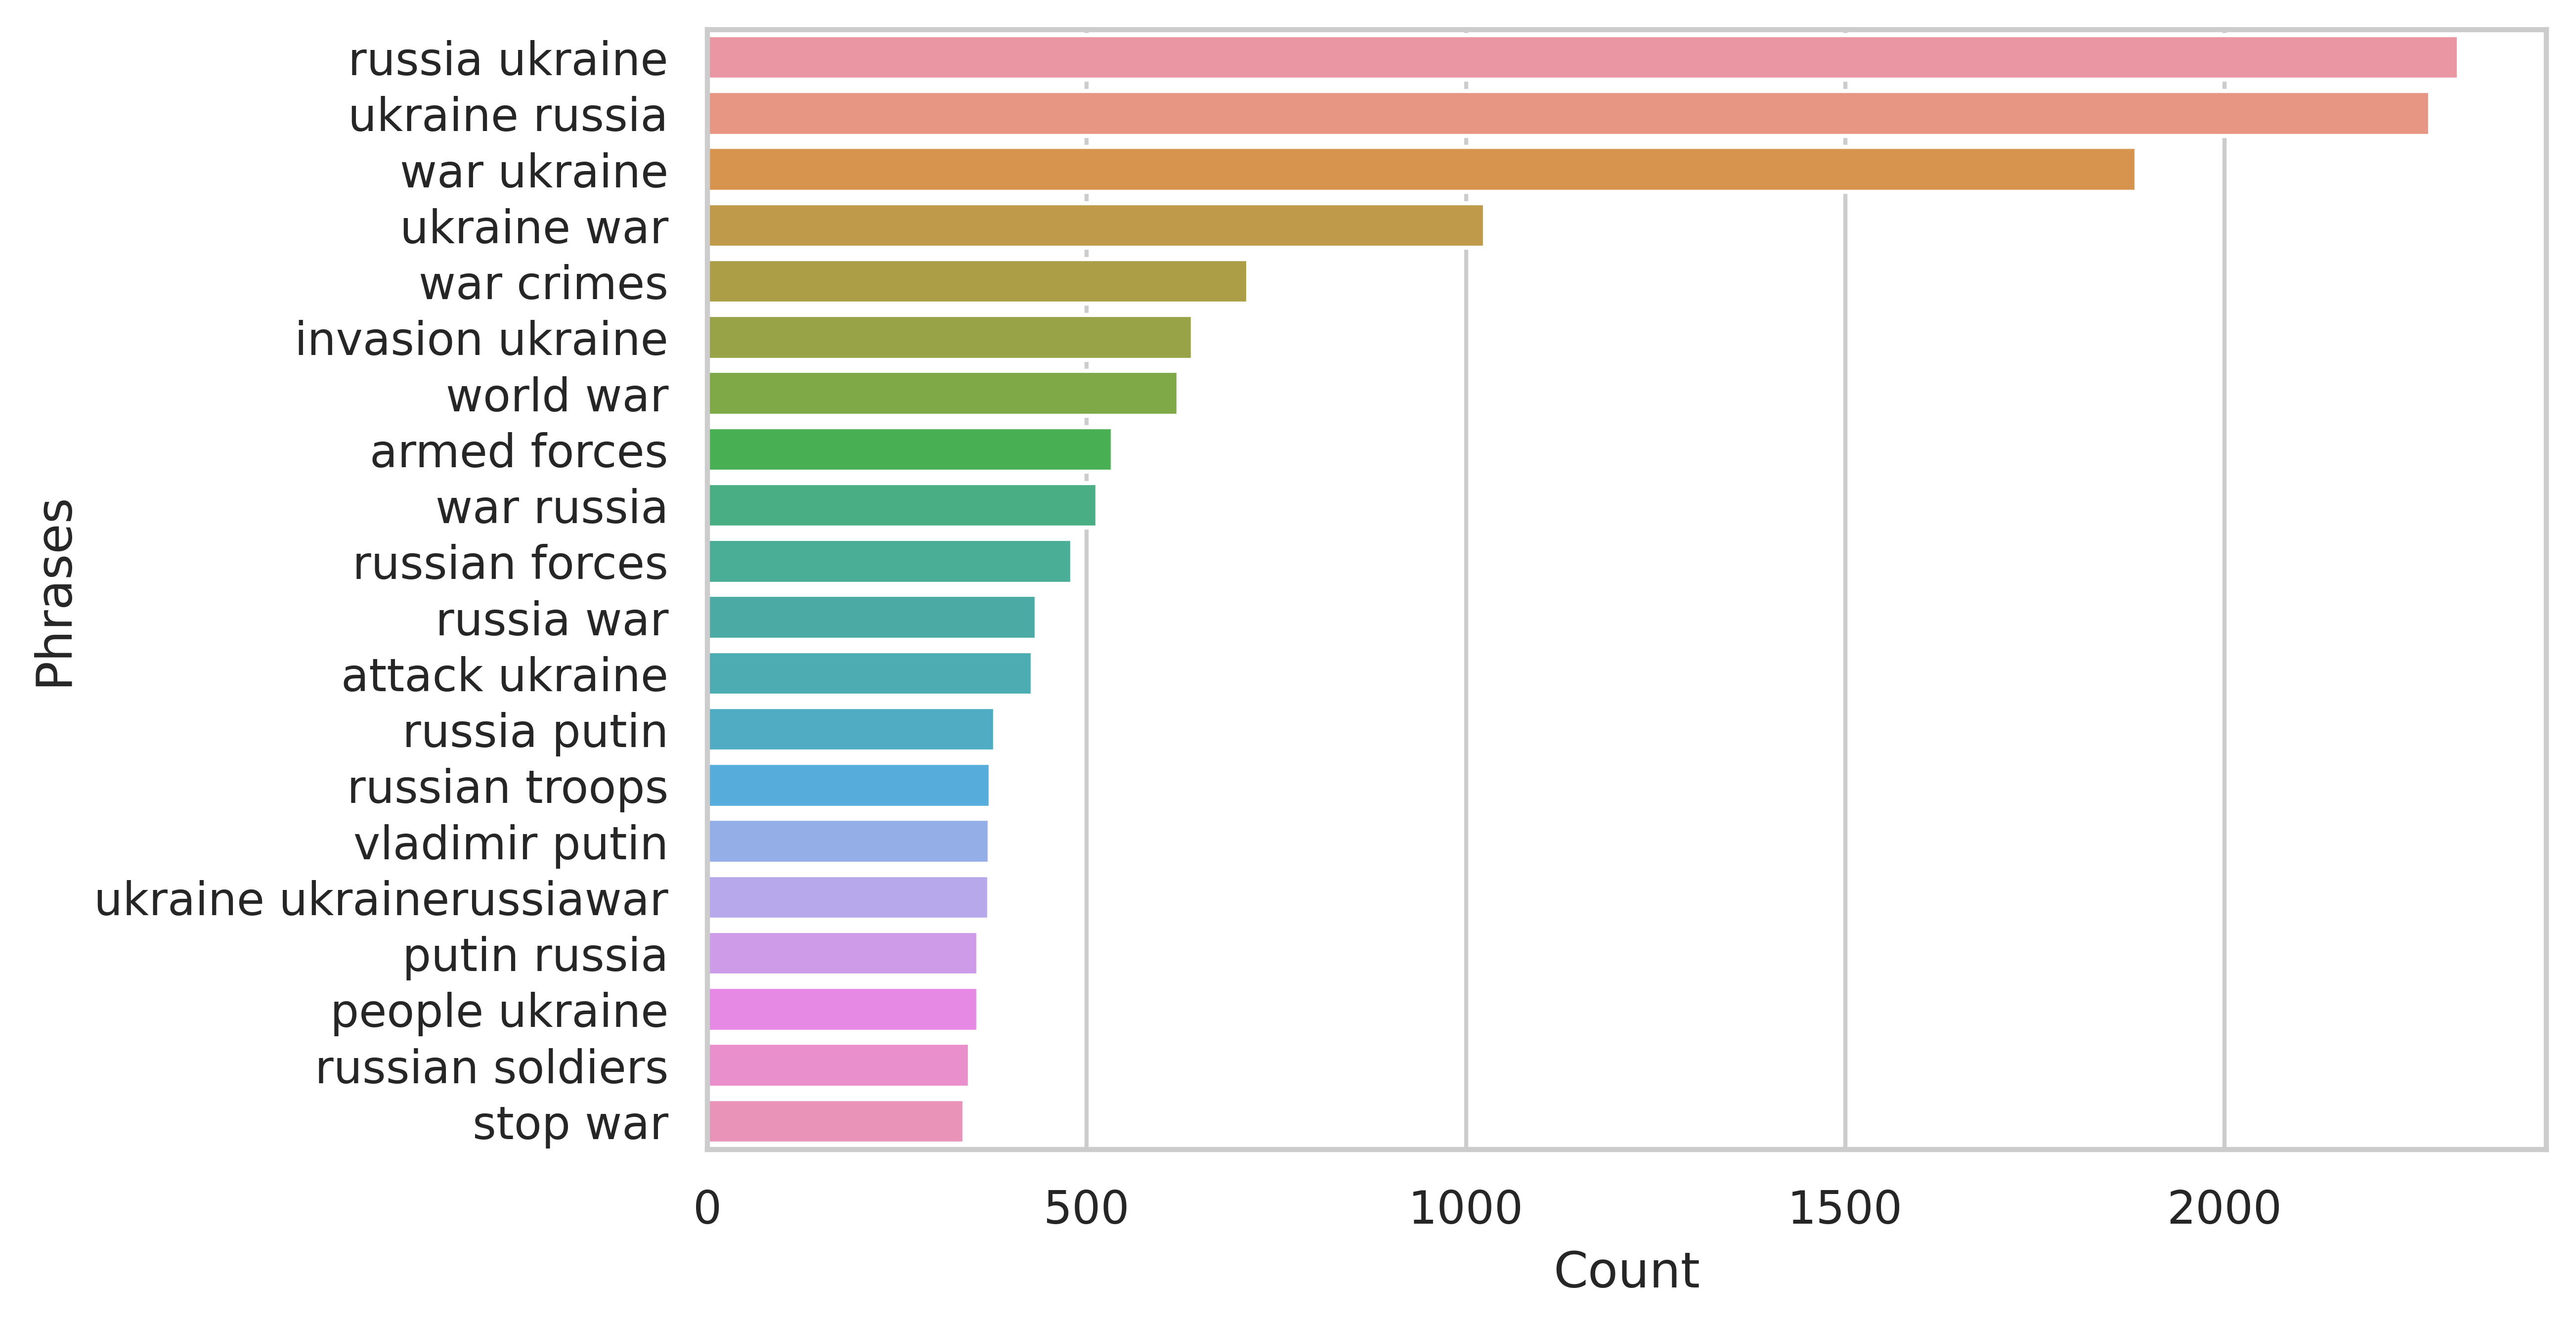

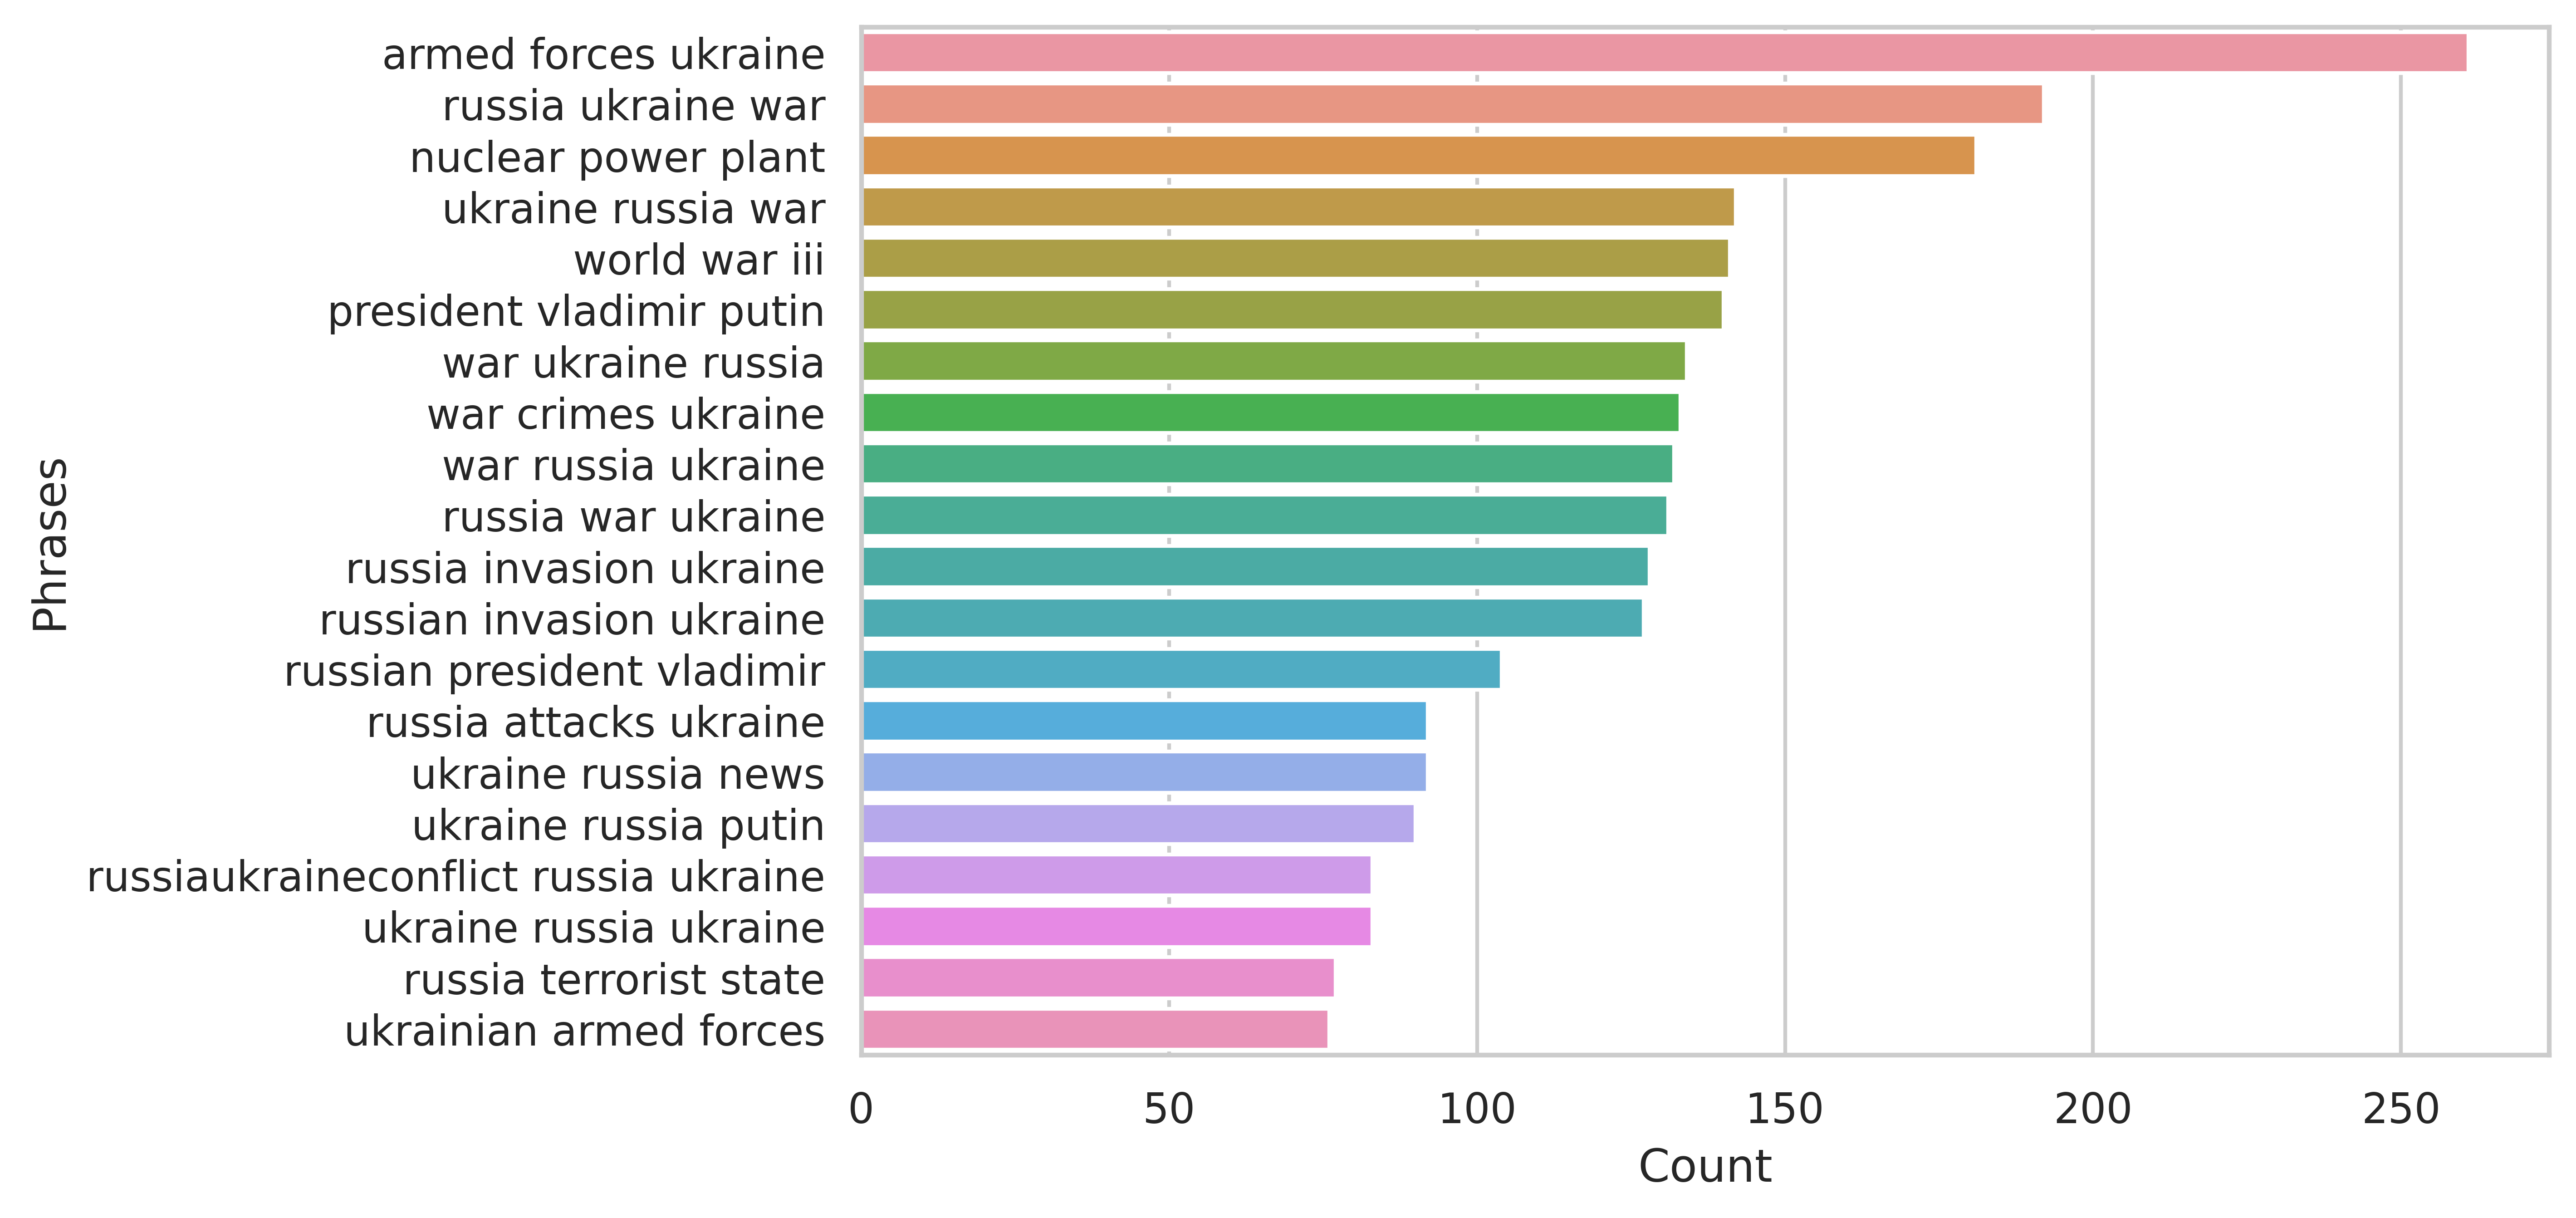

In [53]:
def get_top_n_gram(corpus, ngram_range, n=None):
    vec = CountVectorizer(ngram_range=ngram_range,
                          stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]
def plt_ngram(model):

    n2_bigrams = get_top_n_gram(model, (2, 2), 20)
    plt.figure(figsize=(8, 5),
            dpi=600)  # Push new figure on stack

    sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n2_bigrams))
    plt.ylabel("Phrases")
    plt.xlabel("Count")
 
# n3_trigram
    n3_trigrams = get_top_n_gram(model, (3, 3), 20)
    
    plt.figure(figsize=(8, 5),
            dpi=600)  # Push new figure on stack
    
    sns_plot = sns.barplot(x=1, y=0, data=pd.DataFrame(n3_trigrams))
    plt.ylabel("Phrases")
    plt.xlabel("Count")


print('negative')
plt_ngram(vader_model_neg_ngram)


positive


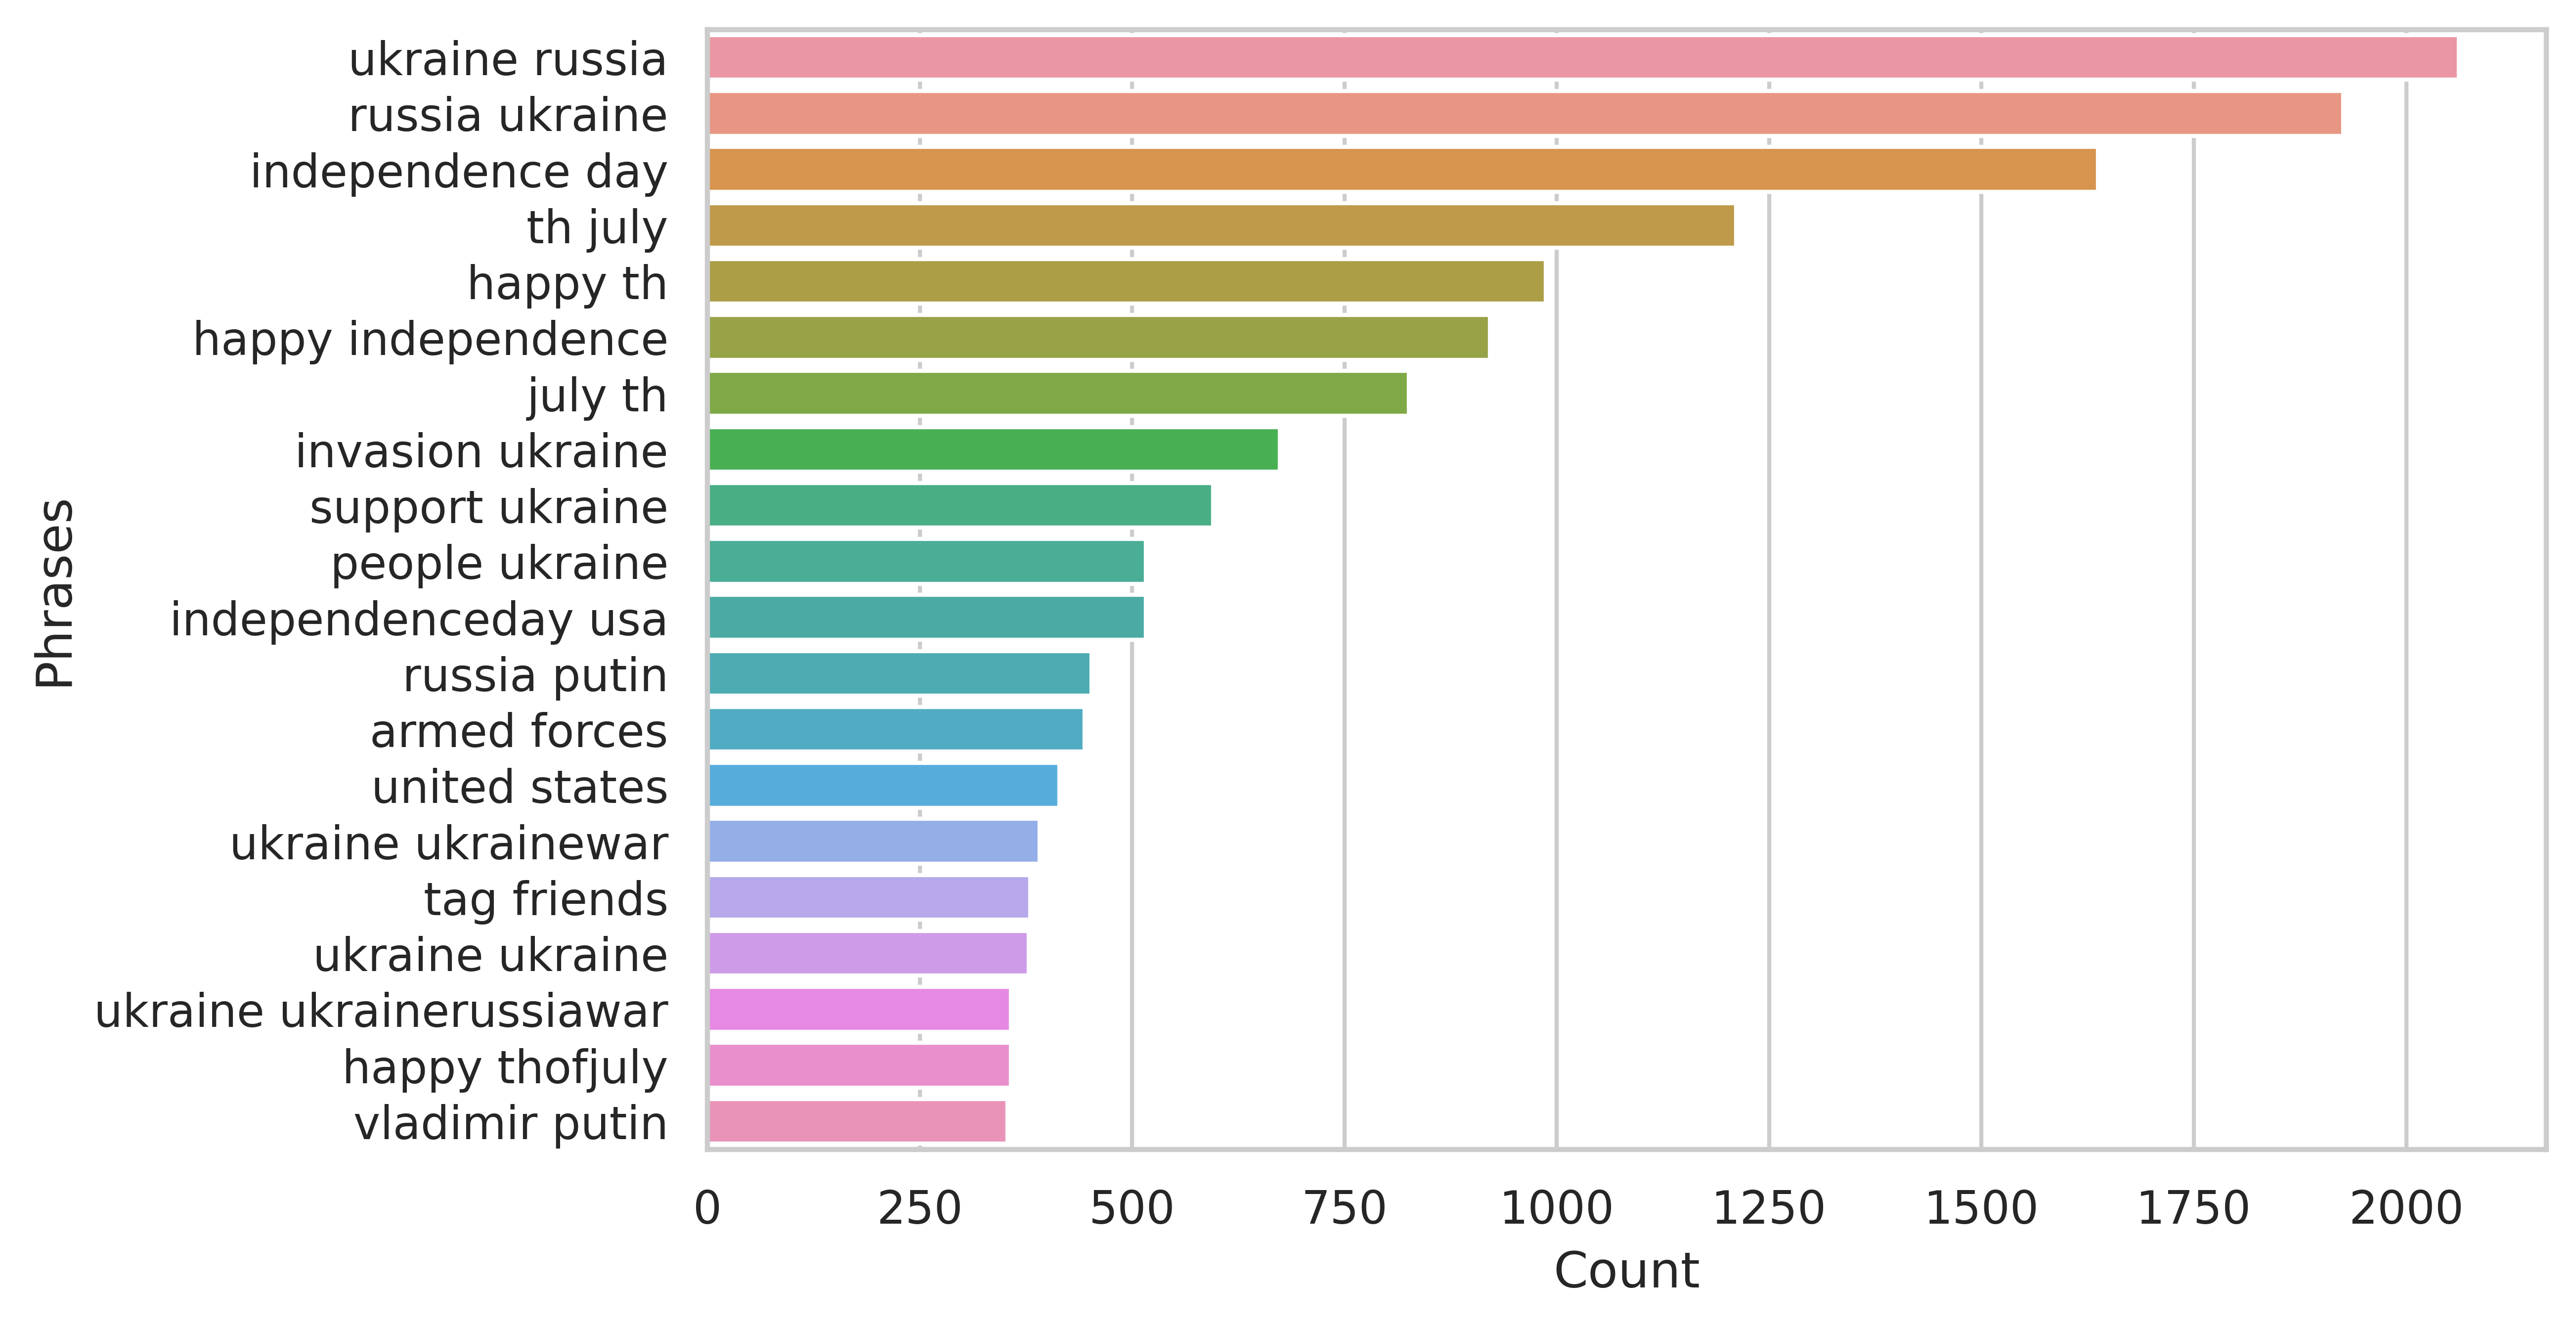

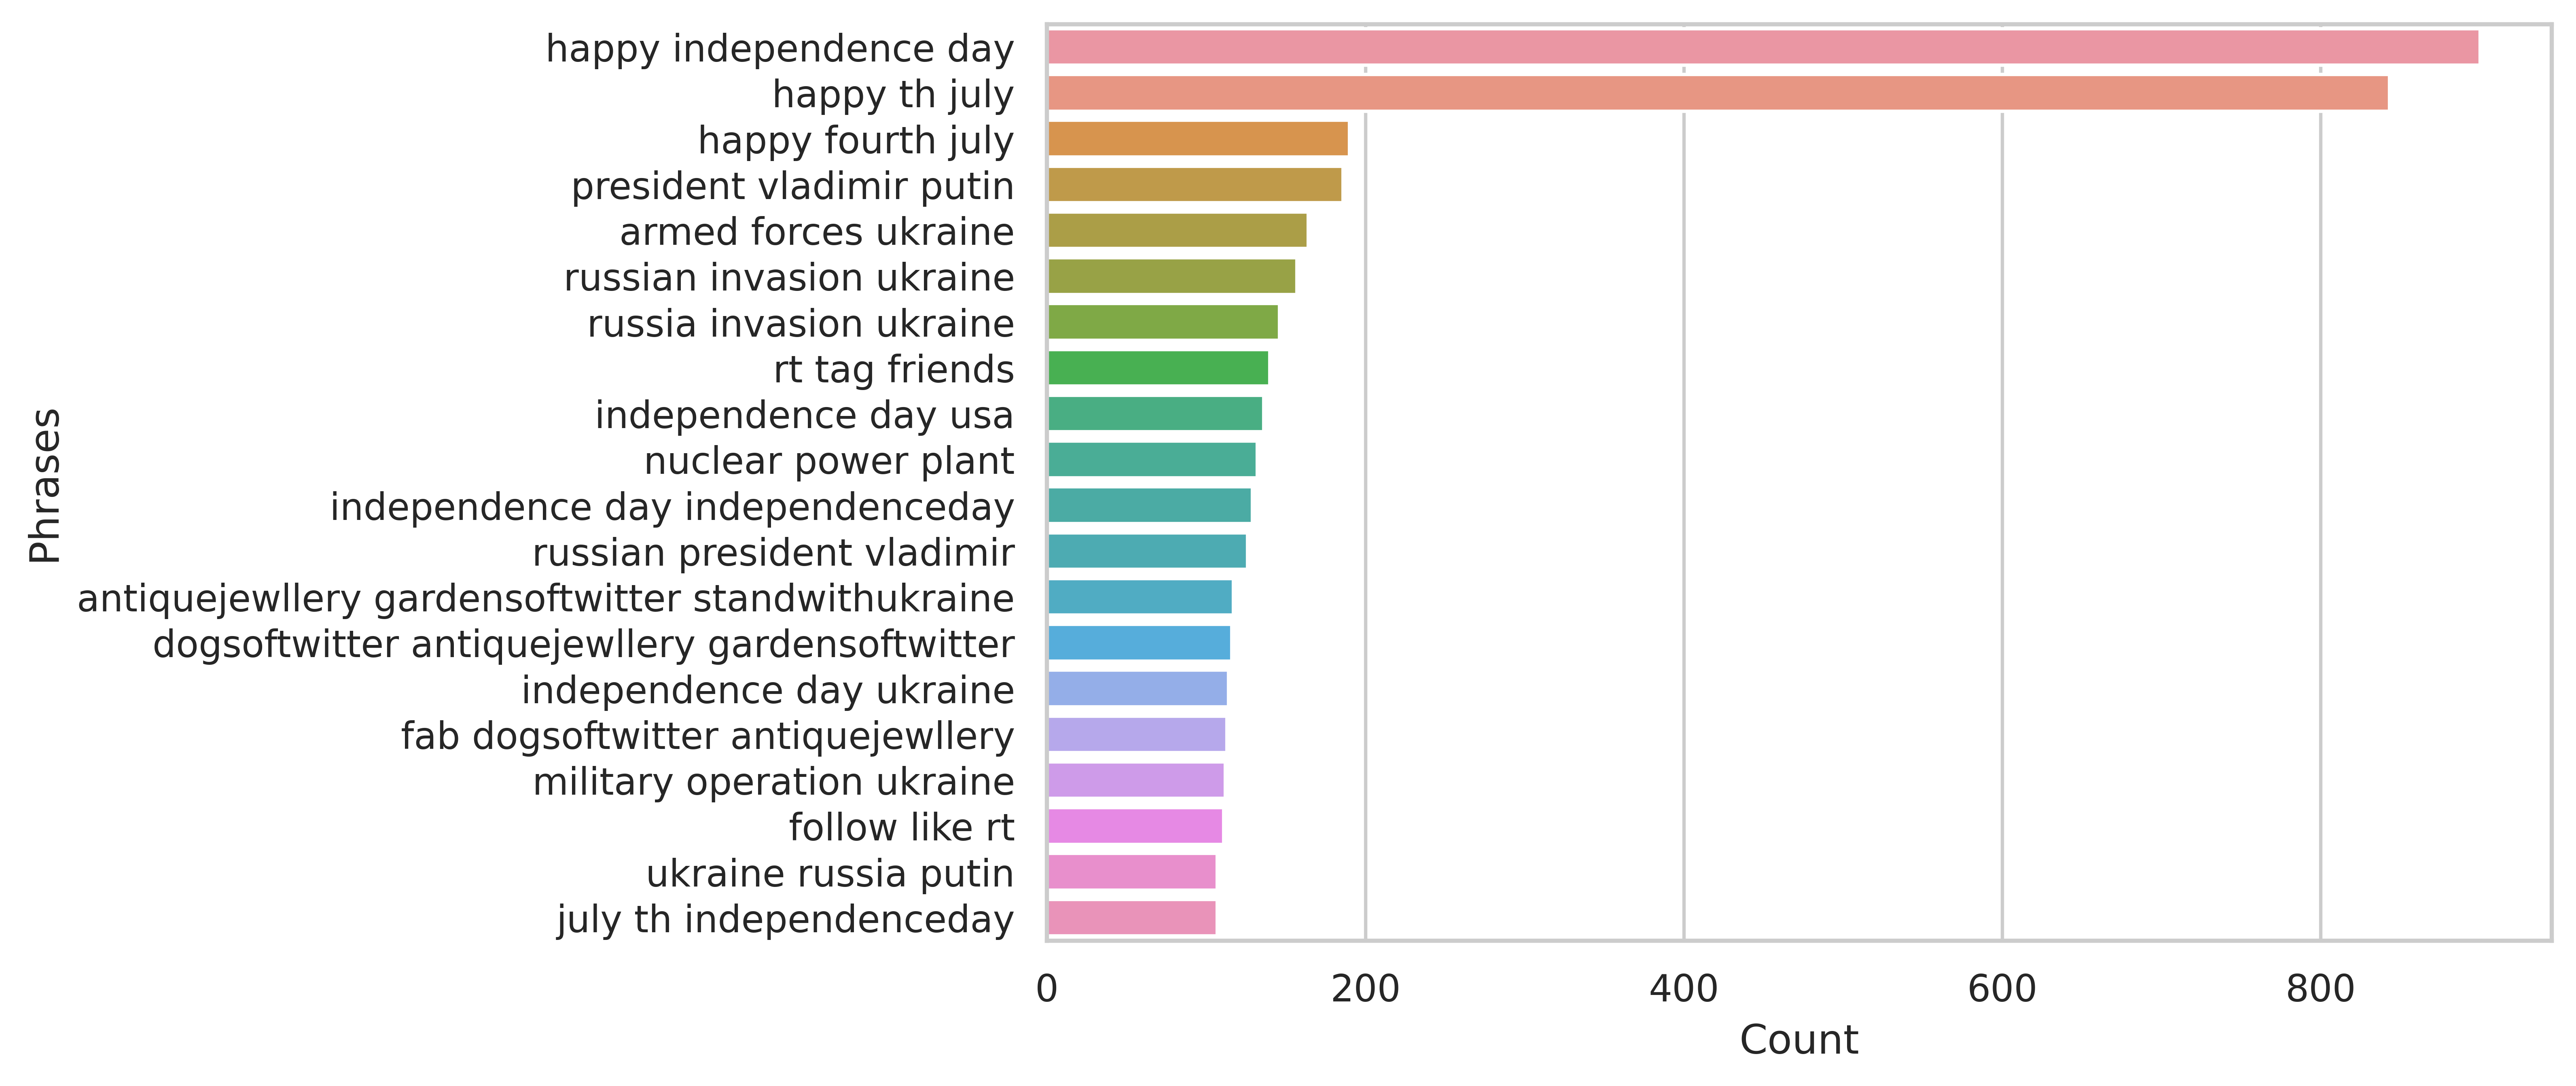

In [54]:
print('positive')
plt_ngram(vader_model_pos_ngram)

## Vader Model Ngram on Support Russia Dataset

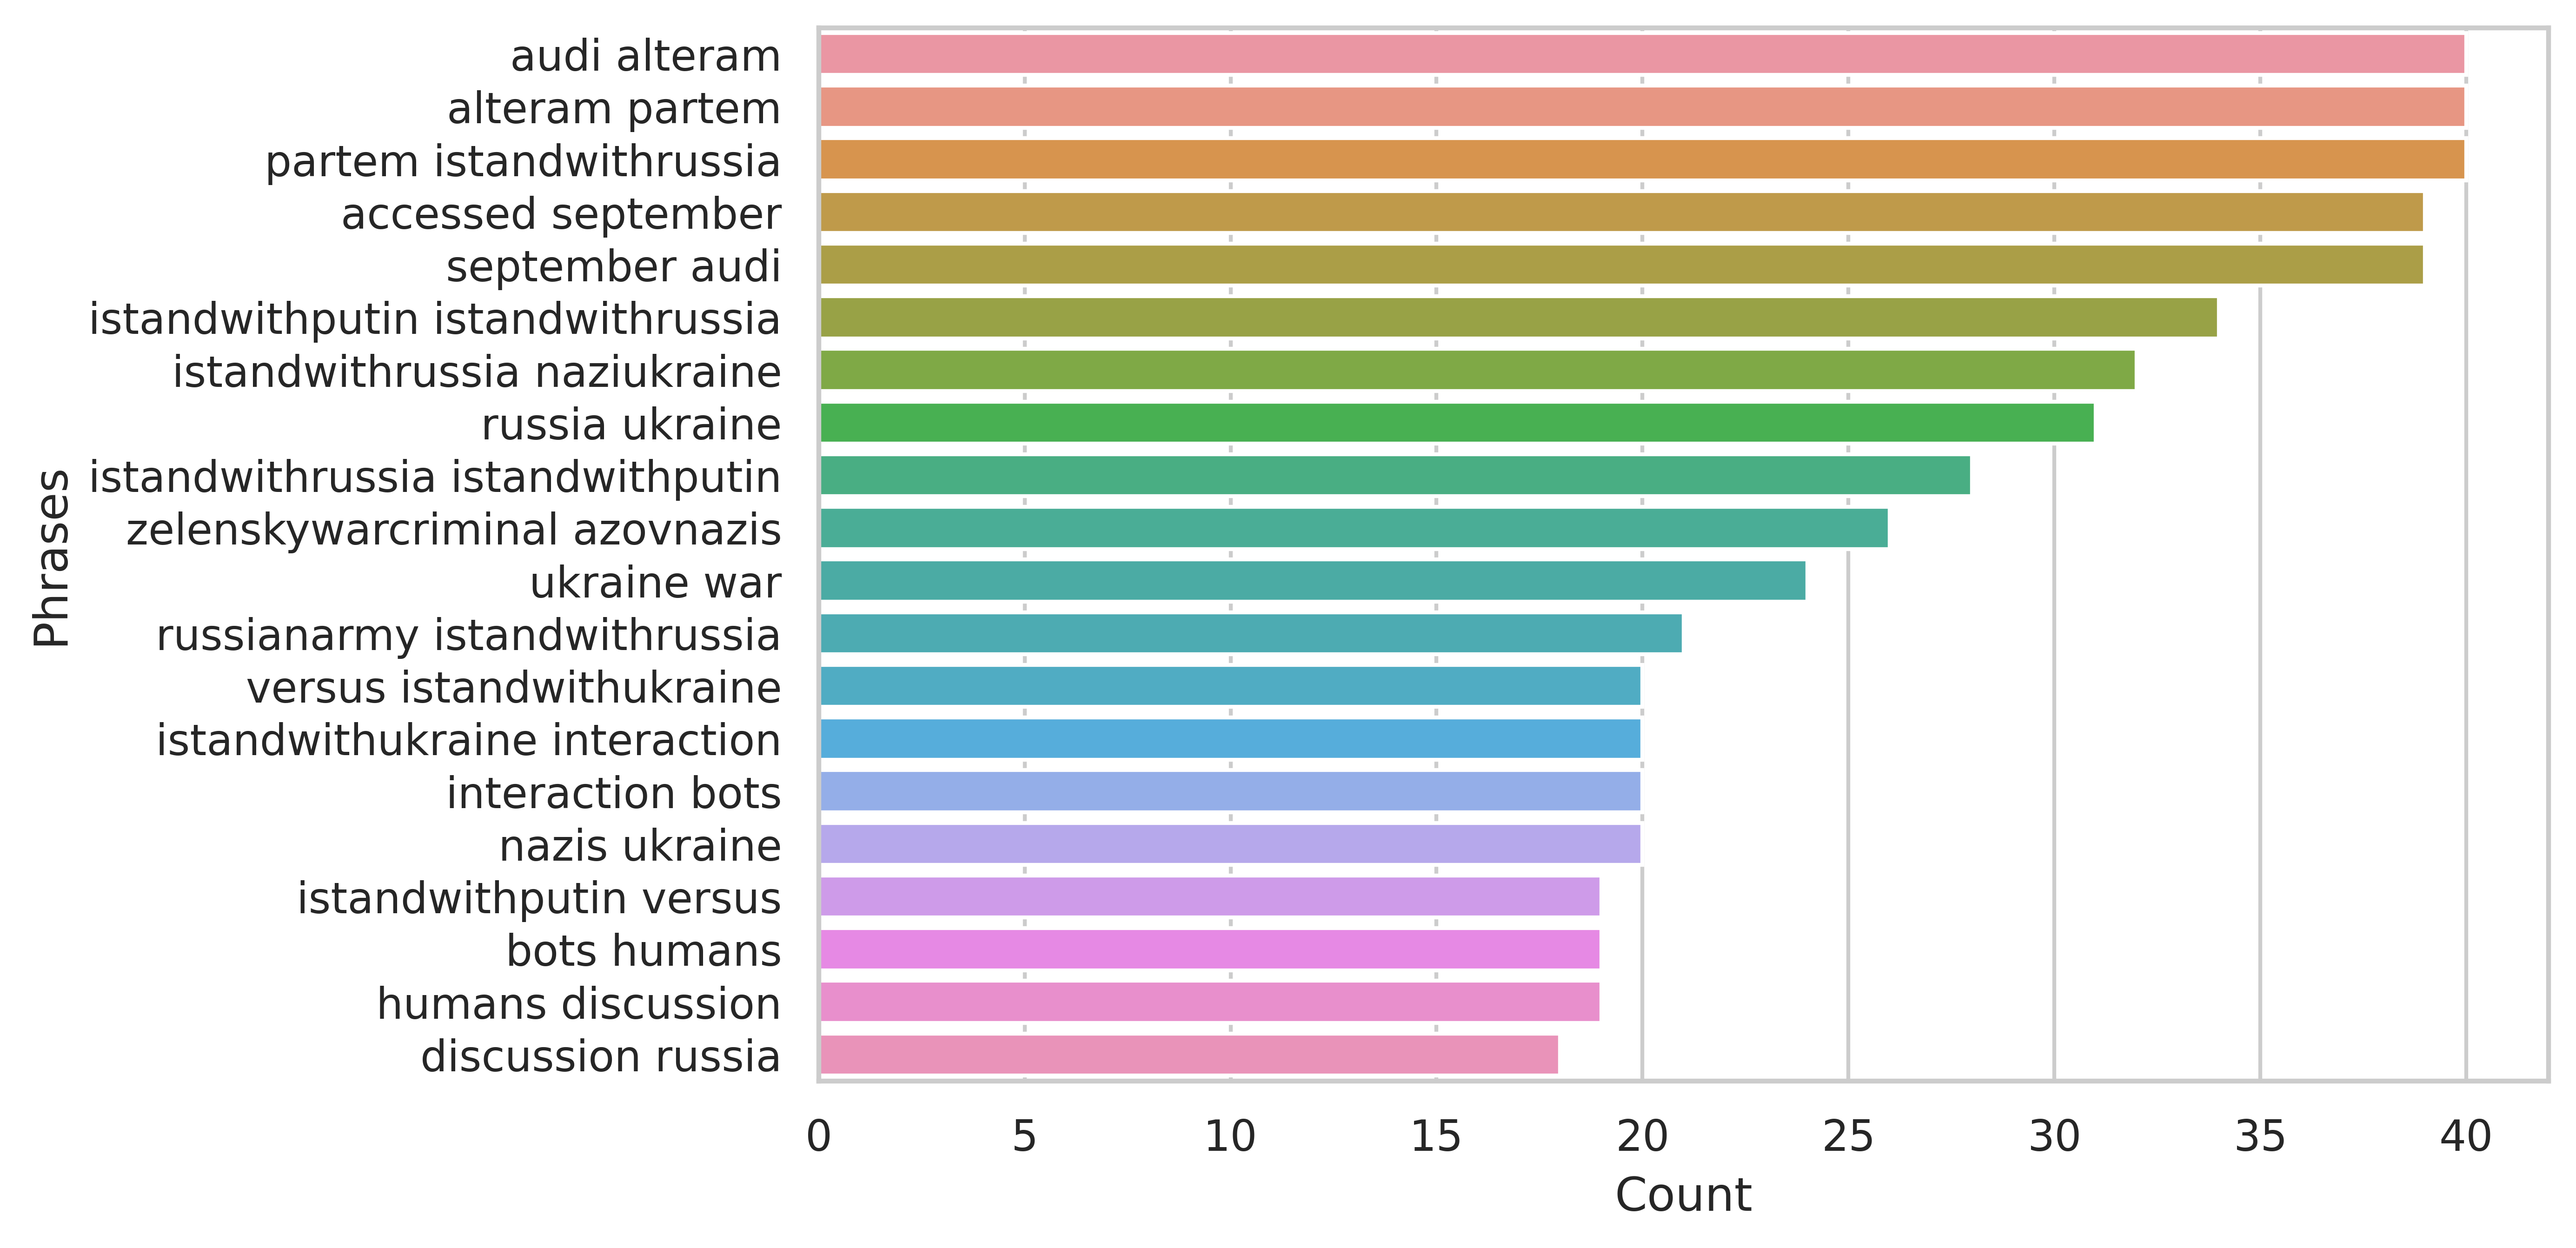

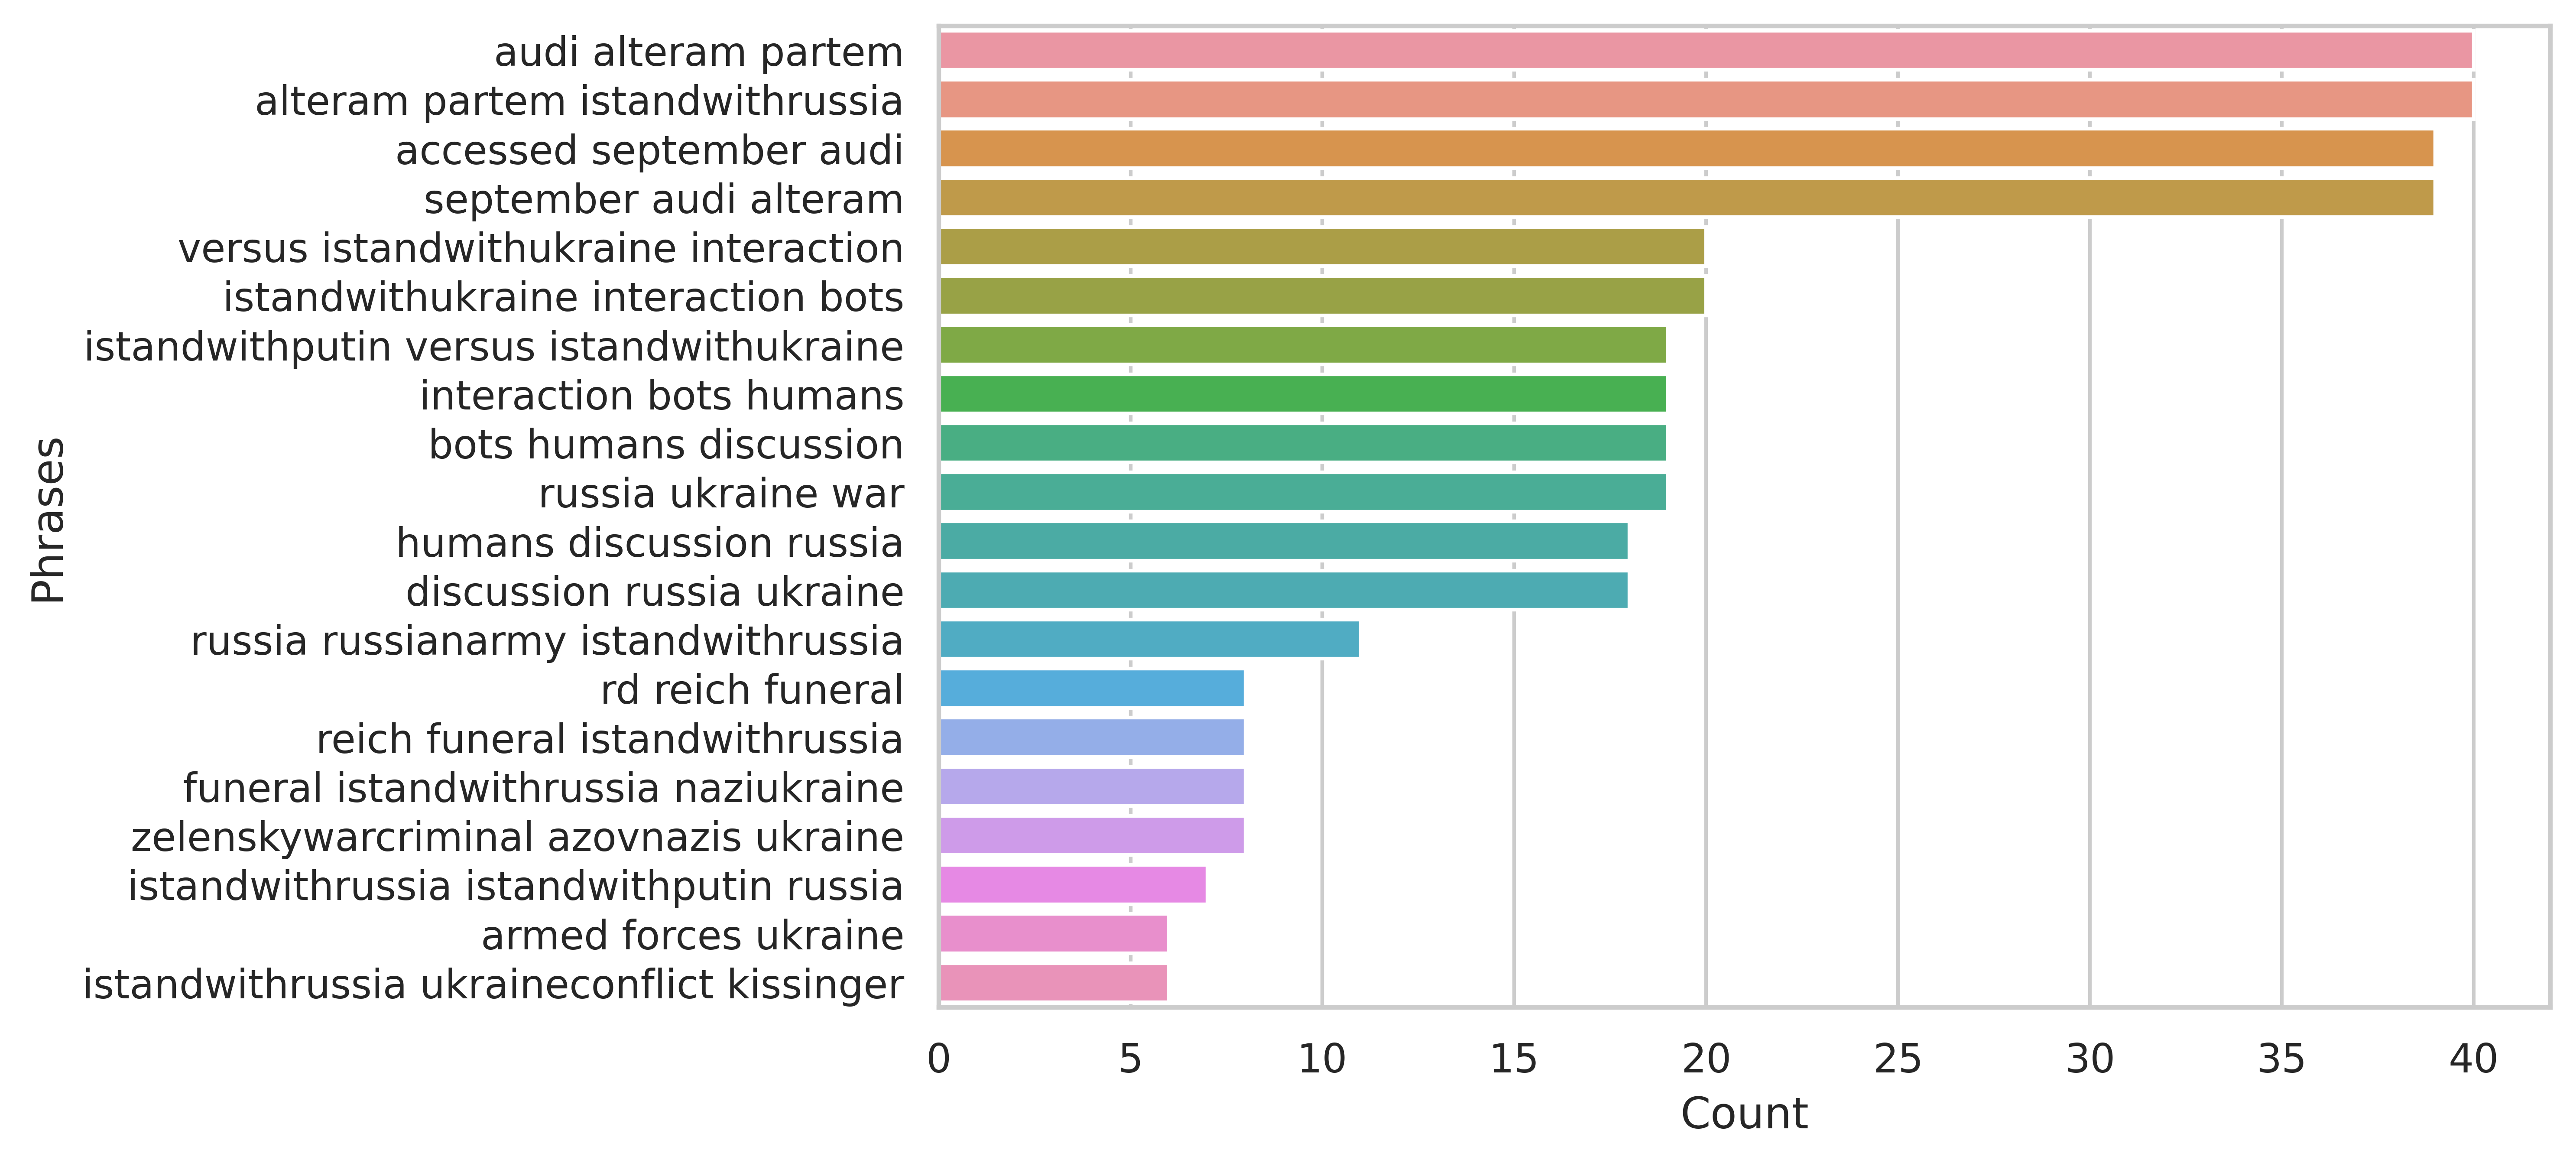

In [55]:
plt_ngram(vader_model_neg_russia_ngram)

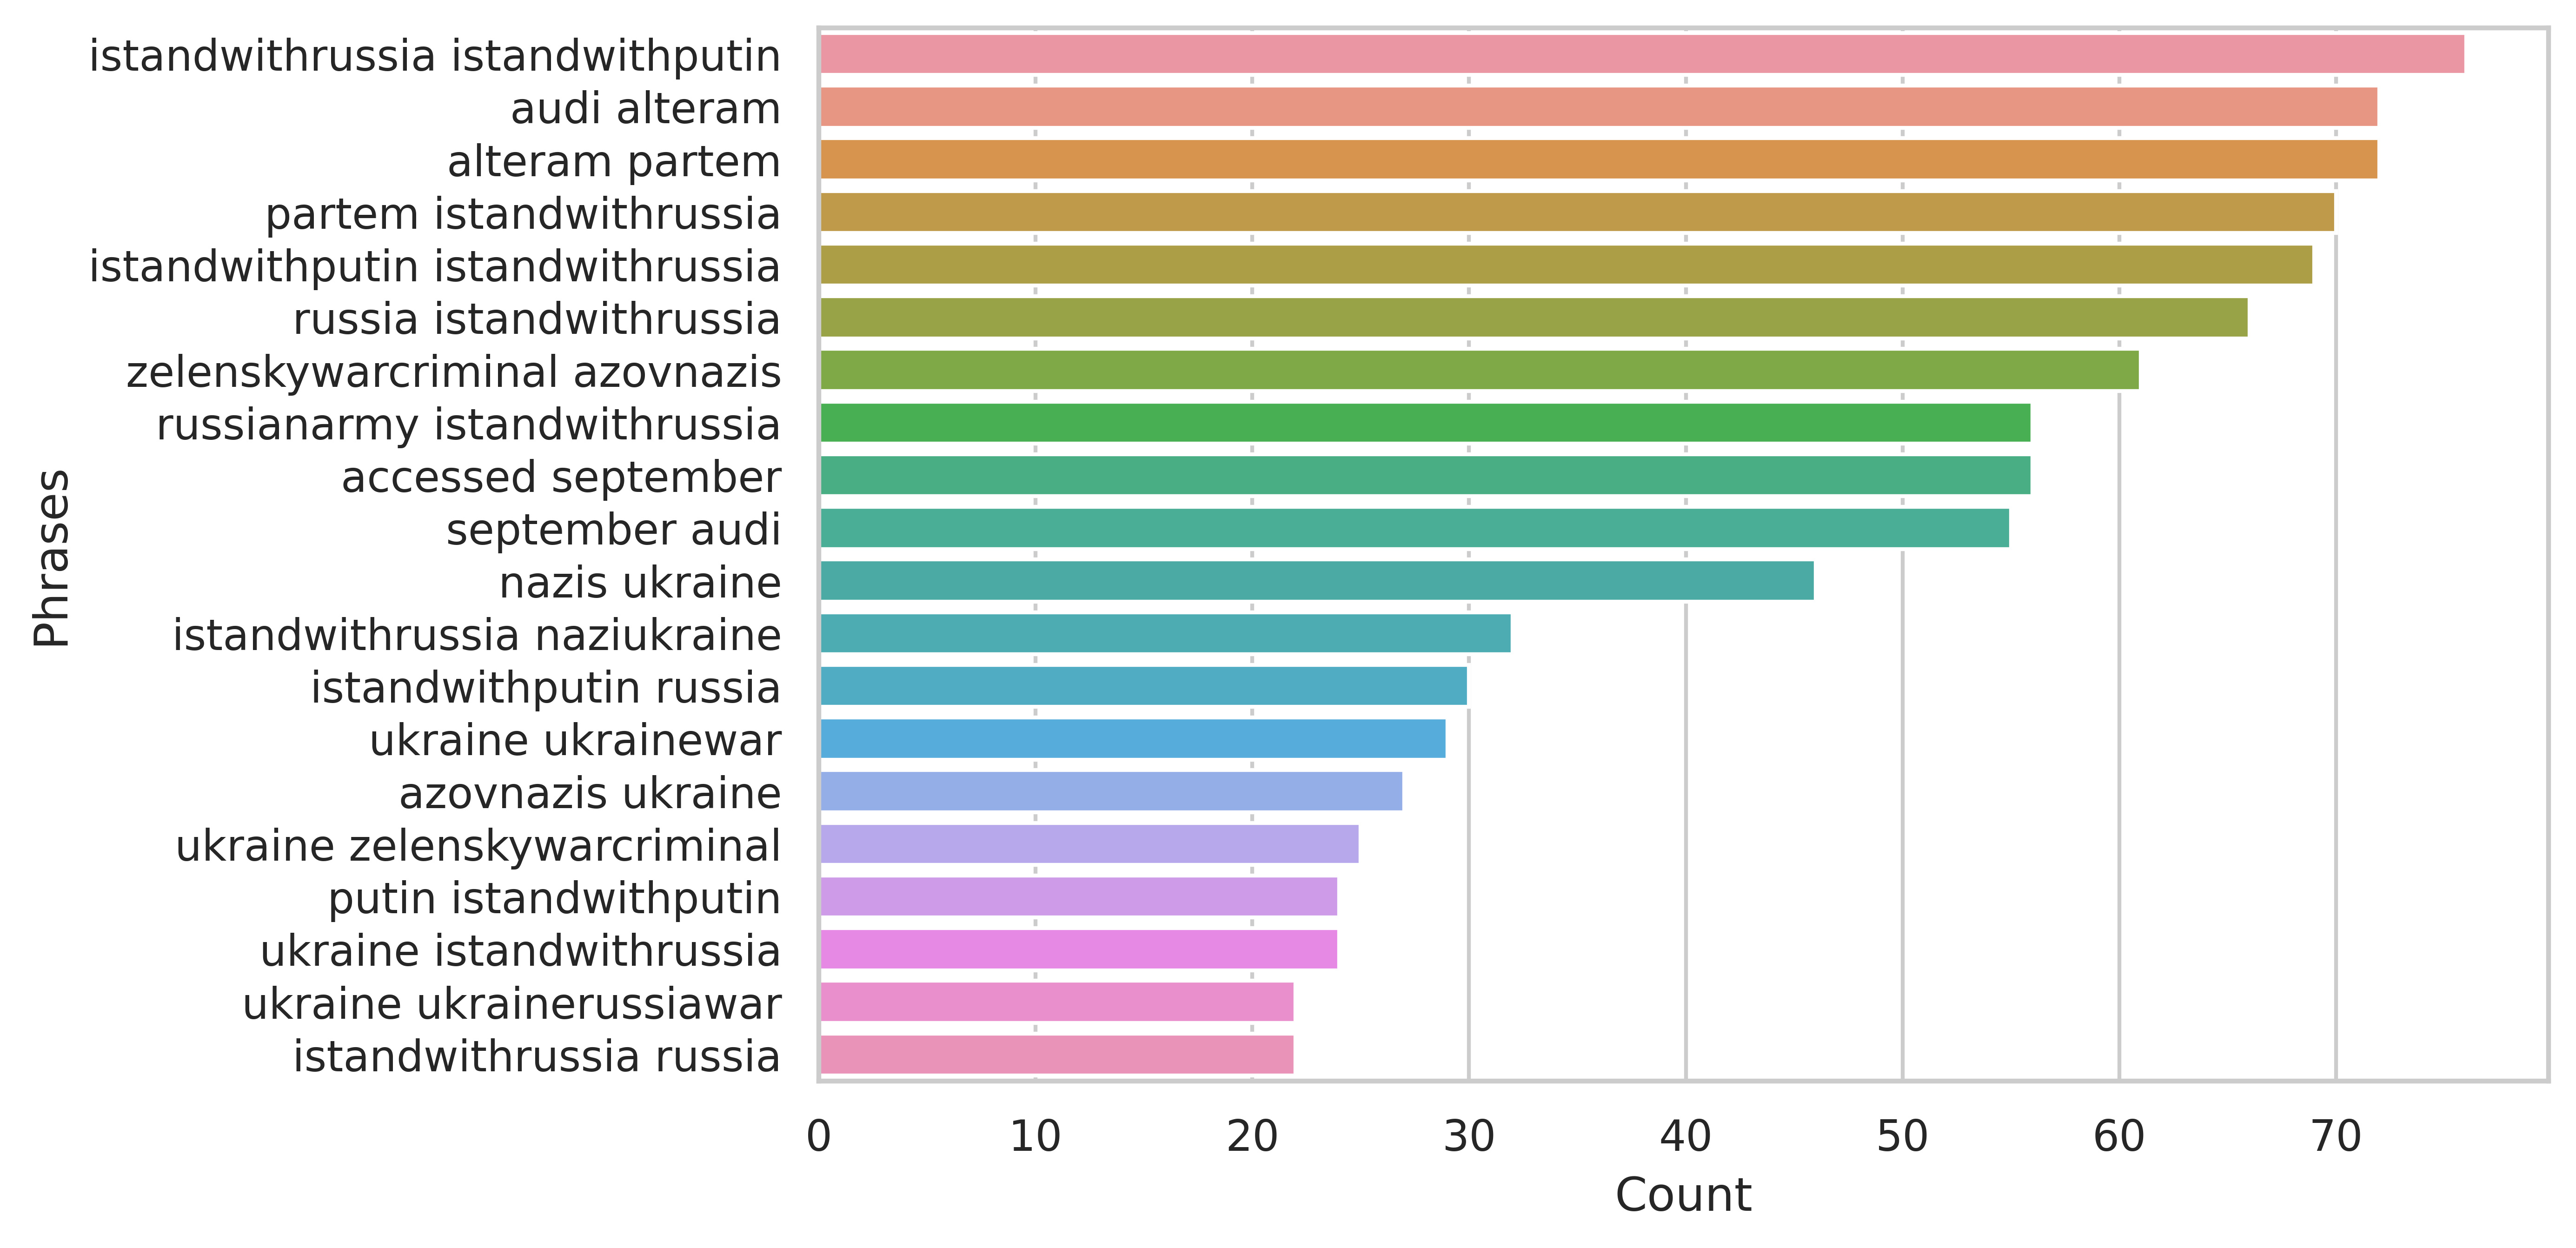

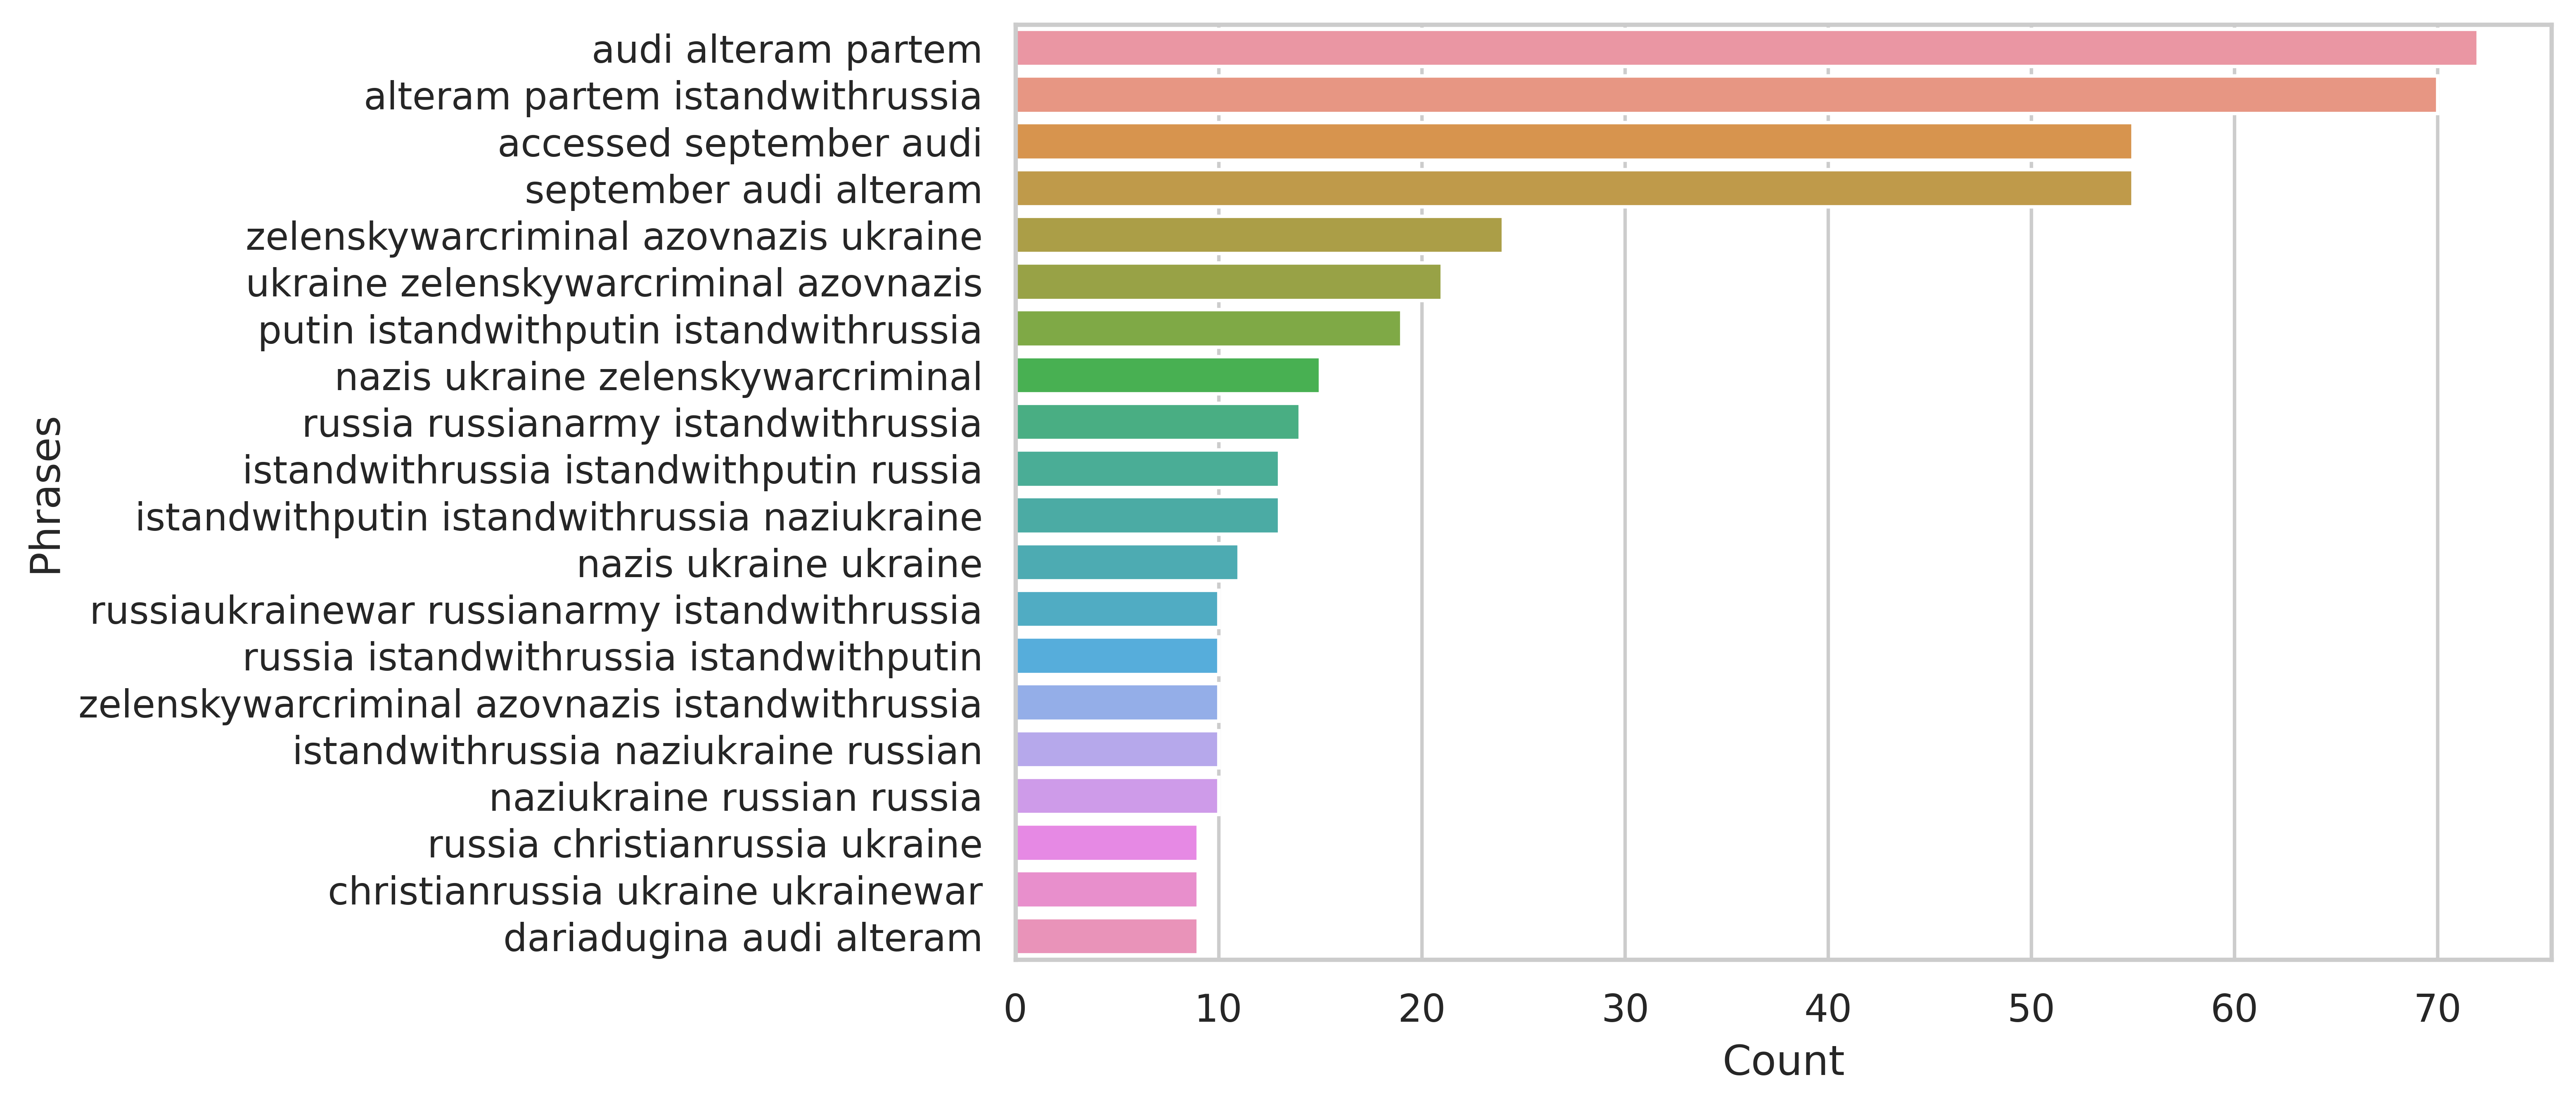

In [56]:
plt_ngram(vader_model_pos_russia_ngram)

## zelenskywarcriminal Dataset

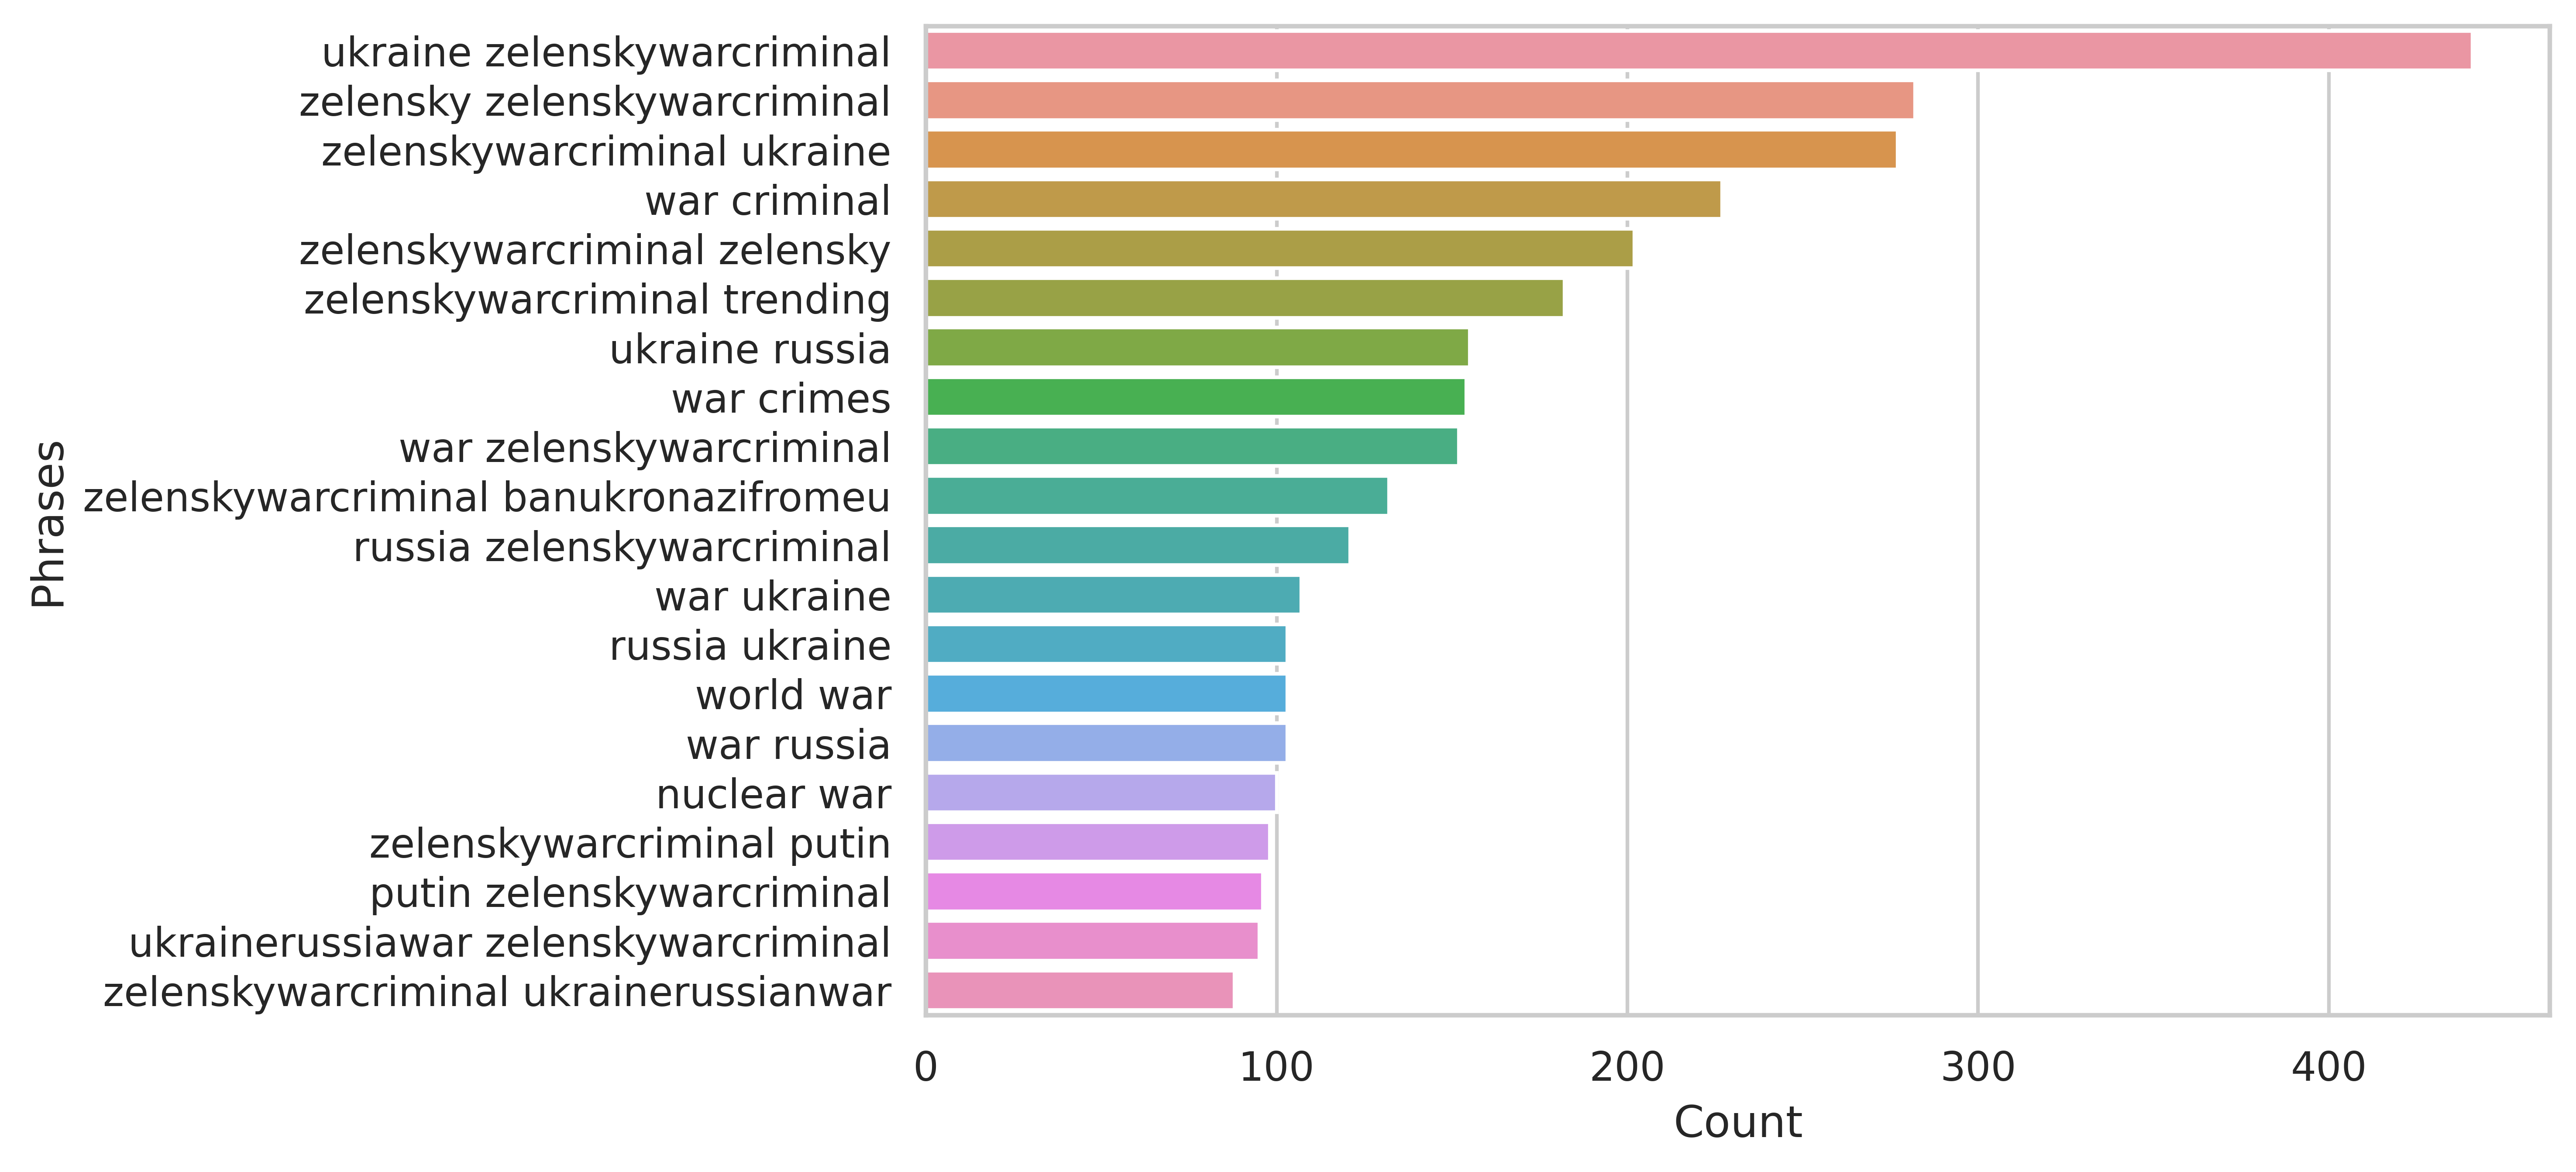

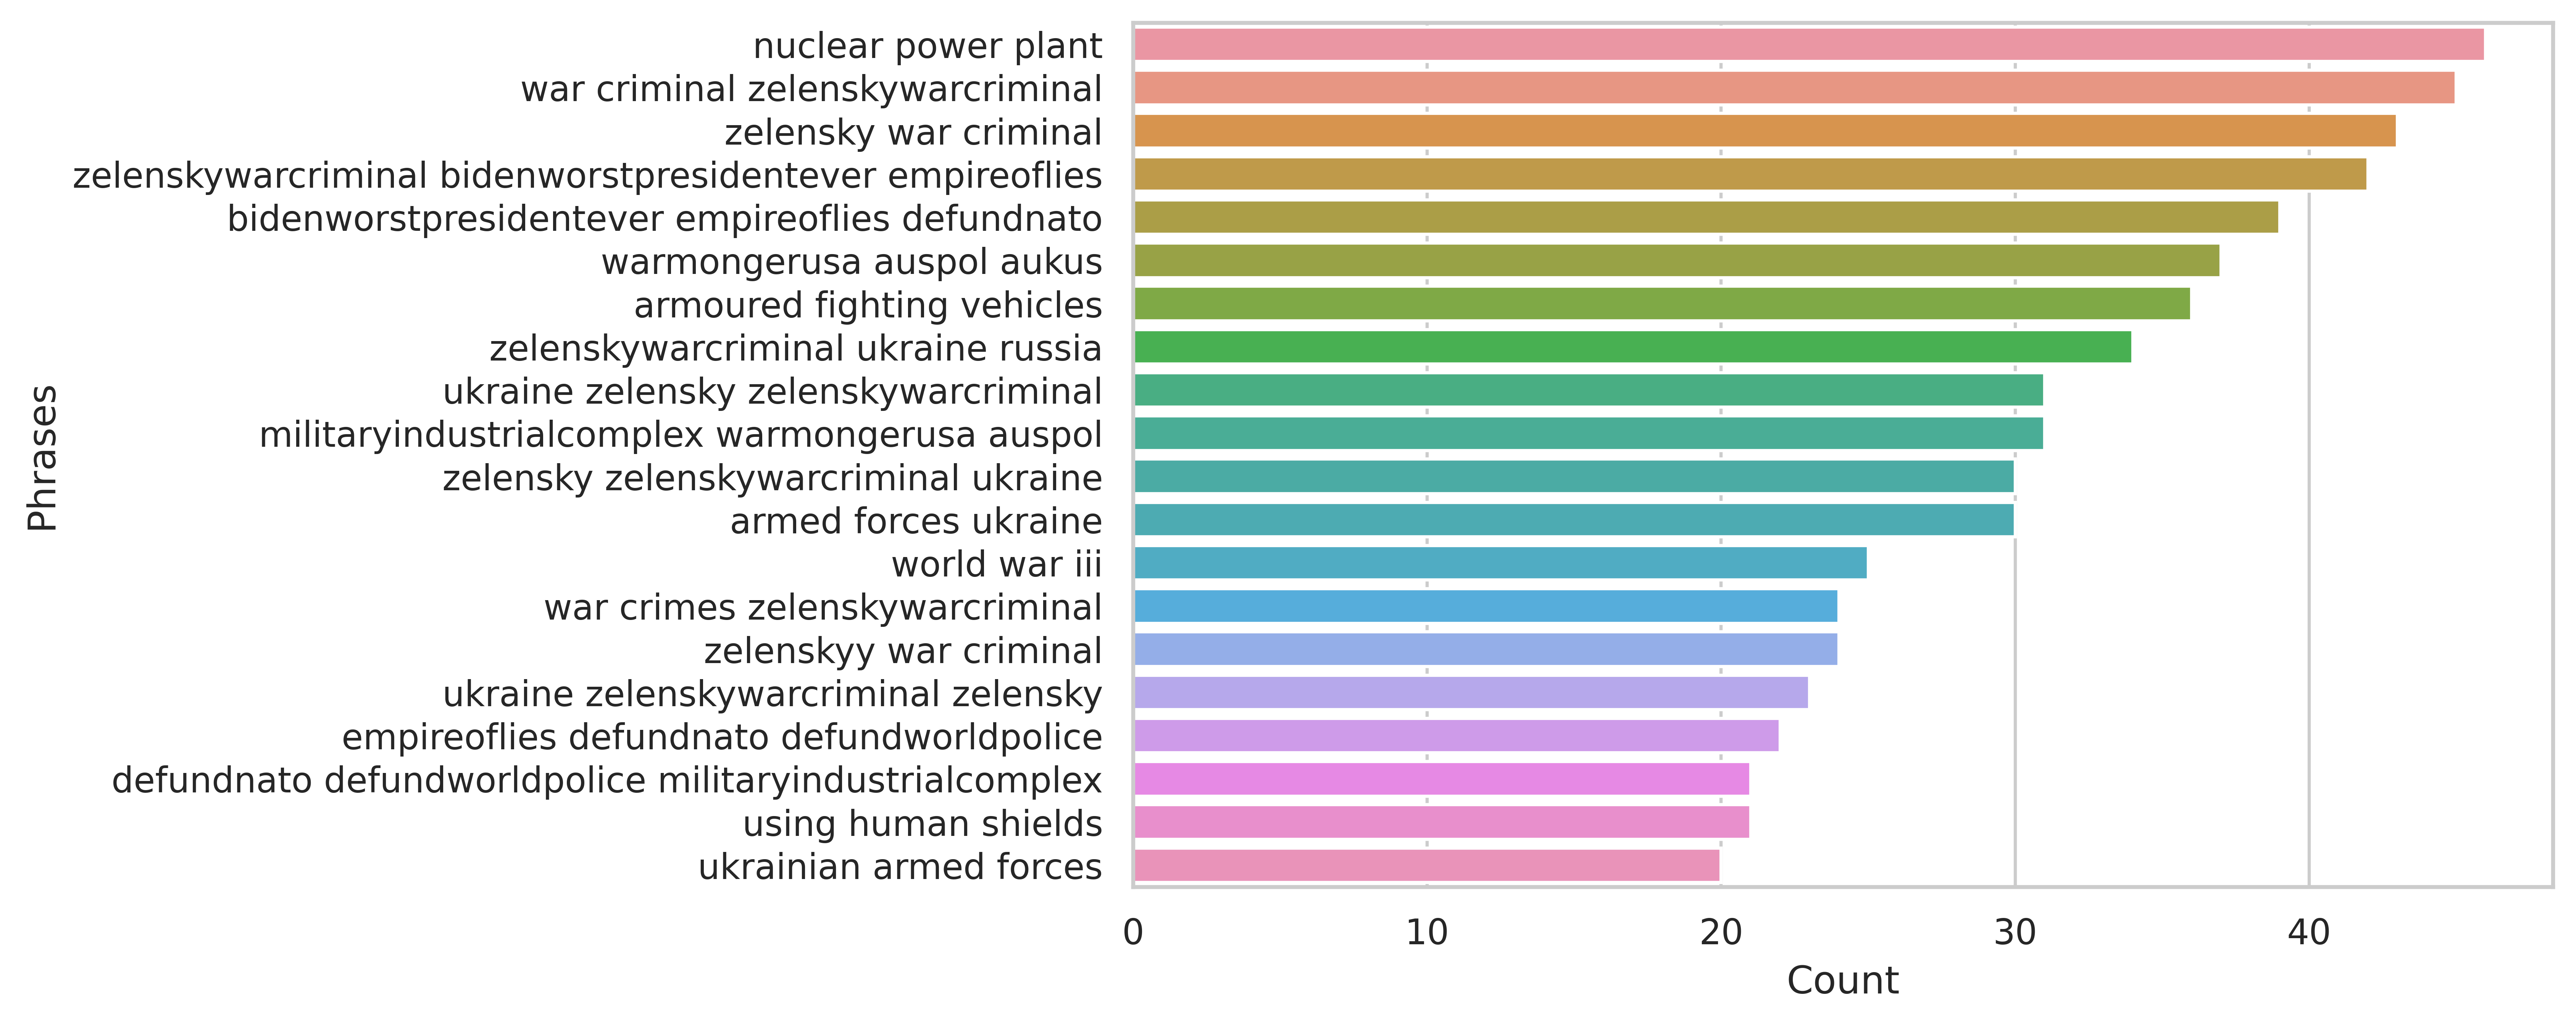

In [57]:
#doing the same as above, but using zelenskywarcriminal dataset
data_russia_zelenskywarcriminal = data_russia_zelenskywarcriminal.rename(columns={'Tweet': 'text'})
data_russia_zelenskywarcriminal = data_russia_zelenskywarcriminal[data_russia_zelenskywarcriminal['Language'] =='en']
df_tweet_russia_zelenskywarcriminal=pd.concat([data_russia_zelenskywarcriminal['User'], data_russia_zelenskywarcriminal['text']],axis=1)

df_tweet_russia_zelenskywarcriminal=text_clean(df_tweet_russia_zelenskywarcriminal)
news_tw_russia_zelenskywarcriminal=vader(df_tweet_russia_zelenskywarcriminal)
news_tw_russia_zelenskywarcriminal['label_pred'] = news_tw_russia_zelenskywarcriminal['label_pred'].map({'pos':1, "neg": 0})

vader_model_neg_russia_zelenskywarcriminal = news_tw_russia_zelenskywarcriminal[news_tw_russia_zelenskywarcriminal['label_pred'] == 0]
vader_model_neg_russia_zelenskywarcriminal = vader_model_neg_russia_zelenskywarcriminal['tweets_without_stopwords'].drop_duplicates().reset_index(drop=True)
plt_ngram(vader_model_neg_russia_zelenskywarcriminal)

# Visualization

### (Word cloud for part 2 data with predictions)-vader&our model


In [58]:
def custom_tokenize(text):

    # split on words only
    tk = nltk.tokenize.RegexpTokenizer(r'\w+')
    tokens = tk.tokenize(text)
    
    
    return tokens

In [59]:
def token_to_words(df, label):
    comments = df[df['label_pred'] == label].tweets_with_lemmer
    tokens = comments.apply(custom_tokenize)
    words = list(chain.from_iterable(tokens))
    return words

In [60]:
pos_words_tw = token_to_words(vader_tweets, 1) #positive 
neg_words_tw = token_to_words(vader_tweets, 0) #negative
pos_words_re = token_to_words(vader_reddit, 1) #positive 
neg_words_re = token_to_words(vader_reddit, 0) #negative

In [61]:
neg_freq_tw = nltk.FreqDist(neg_words_tw)
neg_freq_tw.most_common(50)

[('ukraine', 80870),
 ('russia', 51252),
 ('war', 42650),
 ('russian', 42201),
 ('putin', 20386),
 ('ukrainian', 20084),
 ('people', 11893),
 ('u', 9824),
 ('one', 9524),
 ('mariupol', 8680),
 ('world', 8305),
 ('force', 7963),
 ('nato', 7962),
 ('standwithukraine', 7846),
 ('kyiv', 7370),
 ('attack', 7265),
 ('stop', 7239),
 ('city', 6324),
 ('military', 6130),
 ('invasion', 5583),
 ('civilian', 5532),
 ('country', 5393),
 ('russiaukraineconflict', 5301),
 ('destroyed', 5213),
 ('said', 5196),
 ('killed', 5010),
 ('day', 4939),
 ('germany', 4858),
 ('bucha', 4787),
 ('time', 4567),
 ('biden', 4510),
 ('army', 4369),
 ('region', 4356),
 ('crime', 4327),
 ('president', 4298),
 ('ukrainewar', 4208),
 ('news', 4144),
 ('fire', 4066),
 ('say', 3993),
 ('want', 3987),
 ('month', 3966),
 ('soldier', 3948),
 ('child', 3905),
 ('kharkiv', 3833),
 ('life', 3814),
 ('started', 3765),
 ('like', 3664),
 ('never', 3630),
 ('today', 3629),
 ('worldwar', 3583)]

In [62]:
pos_freq_tw = nltk.FreqDist(neg_words_re)
pos_freq_tw.most_common(50)

[('ukraine', 461),
 ('russia', 431),
 ('putin', 419),
 ('war', 385),
 ('fuck', 309),
 ('russian', 277),
 ('people', 187),
 ('world', 162),
 ('ukrainian', 144),
 ('going', 136),
 ('u', 131),
 ('shit', 125),
 ('attack', 121),
 ('country', 110),
 ('hell', 107),
 ('go', 106),
 ('fucking', 101),
 ('like', 99),
 ('time', 98),
 ('ambassador', 97),
 ('un', 95),
 ('get', 92),
 ('would', 88),
 ('right', 86),
 ('one', 85),
 ('want', 79),
 ('sanction', 78),
 ('kyiv', 77),
 ('nato', 76),
 ('invasion', 73),
 ('military', 72),
 ('even', 66),
 ('know', 65),
 ('think', 63),
 ('troop', 60),
 ('everyone', 60),
 ('x', 59),
 ('stop', 58),
 ('live', 56),
 ('year', 55),
 ('force', 55),
 ('border', 54),
 ('hope', 54),
 ('day', 54),
 ('nuclear', 52),
 ('see', 52),
 ('feel', 52),
 ('need', 52),
 ('say', 50),
 ('man', 50)]

In [63]:
neg_freq_re = nltk.FreqDist(pos_words_tw)
neg_freq_re.most_common(50)

[('ukraine', 102103),
 ('russia', 45825),
 ('russian', 28041),
 ('ukrainian', 25664),
 ('putin', 20157),
 ('people', 19167),
 ('standwithukraine', 15904),
 ('support', 13824),
 ('giveaway', 11499),
 ('show', 10283),
 ('airdrop', 10216),
 ('time', 10130),
 ('u', 10057),
 ('bts', 9711),
 ('said', 8887),
 ('russiaukraineconflict', 8734),
 ('like', 8370),
 ('day', 8310),
 ('usa', 8057),
 ('president', 8004),
 ('ukrainerussiawar', 7929),
 ('nato', 7749),
 ('help', 7574),
 ('one', 7150),
 ('first', 7110),
 ('follow', 6989),
 ('news', 6938),
 ('force', 6733),
 ('kyiv', 6706),
 ('world', 6654),
 ('every', 6405),
 ('come', 6276),
 ('worldwar', 6196),
 ('wwiii', 6153),
 ('military', 6010),
 ('biden', 5965),
 ('nation', 5910),
 ('th', 5882),
 ('home', 5766),
 ('july', 5655),
 ('address', 5600),
 ('nft', 5580),
 ('friend', 5351),
 ('event', 5327),
 ('office', 5152),
 ('country', 5050),
 ('slavaukraini', 5048),
 ('get', 4990),
 ('project', 4966),
 ('zelenskyy', 4928)]

In [64]:
pos_freq_re = nltk.FreqDist(pos_words_re)
pos_freq_re.most_common(50)

[('ukraine', 433),
 ('russia', 276),
 ('russian', 254),
 ('putin', 219),
 ('people', 161),
 ('deleted', 140),
 ('ukrainian', 138),
 ('like', 132),
 ('u', 118),
 ('world', 116),
 ('live', 105),
 ('un', 103),
 ('going', 100),
 ('country', 89),
 ('right', 87),
 ('kyiv', 85),
 ('would', 85),
 ('know', 82),
 ('military', 74),
 ('time', 74),
 ('hope', 71),
 ('explosion', 70),
 ('x', 69),
 ('want', 68),
 ('nato', 68),
 ('get', 67),
 ('force', 66),
 ('really', 65),
 ('one', 64),
 ('fucking', 60),
 ('think', 60),
 ('take', 57),
 ('good', 52),
 ('see', 51),
 ('sanction', 51),
 ('kharkiv', 50),
 ('anyone', 50),
 ('need', 50),
 ('ambassador', 50),
 ('border', 49),
 ('news', 48),
 ('war', 48),
 ('city', 47),
 ('invasion', 47),
 ('source', 46),
 ('troop', 45),
 ('said', 44),
 ('removed', 44),
 ('stay', 44),
 ('sure', 43)]

In [65]:
def wc(pos_freq,neg_freq):
    pos_words=[]
    neg_words=[]
    for i in range(50):
        pos_words.append(pos_freq.most_common(50)[i][0])
        neg_words.append(neg_freq.most_common(50)[i][0])
    text_pos = " ".join(cat for cat in pos_words)
    text_neg = " ".join(cat for cat in neg_words)

    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
    word_cloud_1 = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
    
    return word_cloud, word_cloud_1

In [66]:
wc_pos_tw, wc_neg_tw=wc(pos_freq_tw, neg_freq_tw)

In [67]:
wc_pos_re, wc_neg_re=wc(pos_freq_re, neg_freq_re)

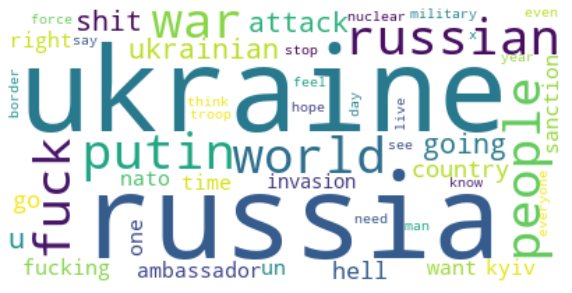

In [68]:
#plotting wordcloud for positive words (tweets)
plt.imshow(wc_pos_tw, interpolation='bilinear')
plt.axis("off")
plt.show()

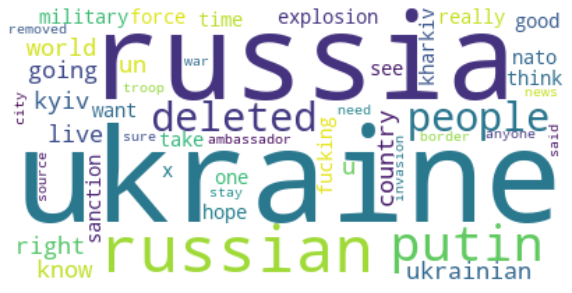

In [69]:
#plotting wordcloud for positive words (reddit)
plt.imshow(wc_pos_re, interpolation='bilinear')
plt.axis("off")
plt.show()

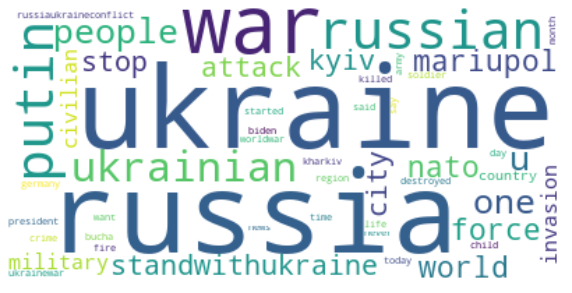

In [70]:
#plotting wordcloud for negative words (tweets)
plt.imshow(wc_neg_tw, interpolation='bilinear')
plt.axis("off")
plt.show()

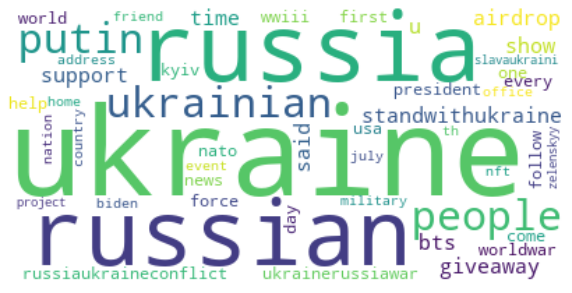

In [71]:
#plotting wordcloud for negative words (reddit)
plt.imshow(wc_neg_re, interpolation='bilinear')
plt.axis("off")
plt.show()

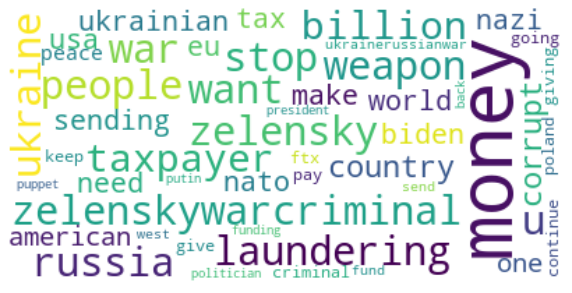

In [72]:
tweet_money=pd.DataFrame()
#we only look for the negative words from the zelenskywarcriminal dataset for vader model
news_tw_russia_new_index = news_tw_russia_zelenskywarcriminal[news_tw_russia_zelenskywarcriminal['label_pred'] == 0].reset_index(drop=True)
for i in news_tw_russia_new_index.index:
        if 'money' in news_tw_russia_new_index['text'][i]: #find out all the tweets contain keyword money
            tweet_money= pd.concat([tweet_money,news_tw_russia_new_index.iloc[i]], axis =1)
tweet_money_reindex = tweet_money.T.reset_index(drop=True)
neg_words_tw = token_to_words(tweet_money_reindex, 0)  

neg_freq_money = nltk.FreqDist(neg_words_tw)
neg_words=[]
for i in range(50):
        neg_words.append(neg_freq_money.most_common(50)[i][0])
text_neg = " ".join(cat for cat in neg_words)

word_cloud_1 = WordCloud(collocations = False, background_color = 'white').generate(text_neg)
plt.imshow(word_cloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analyzing hashtags from twitter data

In [73]:
# select columns needed for analysis
df1 = df_tweet["text"]
df1.head()

0    Footage of the airport bombing in Ivano-Franki...
1    Ukraine MP Sophia Fedyna tells about the groun...
2    A cruise missile fired by the Russian army fel...
3    SPREAD AND SHARE, YOU CAN HELP UKRAINE #Ukrain...
4    Footage of the airport bombing in Ivano-Franki...
Name: text, dtype: object

In [74]:
# clean data with defined functions, retain hashtags and special characters
df_clean = df1.astype(str).str.lower()
df_clean = df_clean.apply(parser)
df_clean = df_clean.apply(normalize)
df_clean = df_clean.apply(remove_URL)
df_clean = df_clean.apply(remove_mentions)
df_clean = df_clean.apply(remove_spaces)

In [75]:
# remove stop words

# define set of nltk stopwords
stop_words = set(stopwords.words('english'))

#adding new stopwords
stop_words.add("i'm")
stop_words.add("they're")
stop_words.add("thats")
stop_words.add("tho")
stop_words.add("also")

# create new column for tweet without stop words
df_clean = df_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_clean.head()

0    footage airport bombing ivanofrankivsk. #ukrai...
1    ukraine mp sophia fedyna tells ground situatio...
2    cruise missile fired russian army fell kiev #u...
3          spread share, help ukraine #ukraine #russia
4    footage airport bombing ivanofrankivsk. #ukrai...
Name: text, dtype: object

**Our model**

In [76]:
# concat clean text with label
df2 = pd.concat([df_clean, pd.DataFrame(pred_tweet, columns = ["label_pred"])], axis = 1)
df2.head()

text  label_pred
0  footage airport bombing ivanofrankivsk. #ukrai...           0
1  ukraine mp sophia fedyna tells ground situatio...           1
2  cruise missile fired russian army fell kiev #u...           0
3        spread share, help ukraine #ukraine #russia           0
4  footage airport bombing ivanofrankivsk. #ukrai...           0

In [77]:
# filter df with (-ve) labels
df_neg = df2[df2.label_pred == 0]
df_neg = df_neg["text"]

# filter df with (+ve) labels
df_pos = df2[df2.label_pred == 1]
df_pos = df_pos["text"]

Extract the hashtags

In [78]:
# define function
def extract_hashtags(df):
    hashtag = []
    for i in df.index:
      hash = re.findall(r"#(\w+)", df[i])
      hashtag.extend(hash)
    return hashtag

In [79]:
df_neg[0]

'footage airport bombing ivanofrankivsk. #ukraine #russia'

In [80]:
# extract hashtags in (-ve & +ve) tweets into a list
hashtags_neg_list = extract_hashtags(df=df_neg)
hashtags_pos_list = extract_hashtags(df=df_pos)

In [81]:
# read the frequency of the most common hashtags for (-ve & +ve) tweets
hashtag_count_neg = Counter(hashtags_neg_list)
hashtag_count_pos = Counter(hashtags_pos_list)
hashtag_count_neg_df = pd.DataFrame.from_records(hashtag_count_neg.most_common(50), columns=['hashtags','count'])
hashtag_count_pos_df = pd.DataFrame.from_records(hashtag_count_pos.most_common(50), columns=['hashtags','count'])

In [82]:
hashtag_count_neg_df

hashtags  count
0                   ukraine  62566
1                    russia  44294
2                     putin  12104
3          standwithukraine  11171
4     russiaukraineconflict   8964
5                   russian   8818
6                      nato   5344
7                     wwiii   5098
8                 worldwar3   4834
9                ukrainewar   4151
10         ukrainerussiawar   3903
11                     kyiv   3822
12                 mariupol   3814
13                     news   3811
14                ukrainian   3631
15                      usa   3251
16                      bts   3240
17                  grammys   3234
18                  btsarmy   3220
19            russiaukraine   2692
20               stoprussia   2595
21                  ukraina   2460
22             slavaukraini   2452
23         russiaukrainewar   2352
24  russiaisaterroriststate   2097
25                    china   2005
26                    bucha   1976
27                anonymous   1917
28        ukrainerussianwar   1851
29      ukrainerussiacrisis   1848
30                 breaking   1735
31                    biden   1544
32    ukrainerussiaconflict   1474
33                 giveaway   1454
34                  stopwar   1416
35                      war   1365
36            ukrainerussia   1334
37            ukrainerussie   1294
38          championsleague   1284
39                  germany   1279
40                     kiev   1254
41                   moscow   1209
42      russiaukrainecrisis   1202
43                      ww3   1187
44                   europe   1056
45                 zelensky   1033
46            ukrainecrisis   1028
47                       us   1015
48            armukrainenow   1012
49                  donetsk    972

In [83]:
hashtag_count_pos_df

hashtags  count
0                 ukraine  66942
1                  russia  20760
2        standwithukraine  12577
3                   putin  11055
4                 russian  10793
5                giveaway   7501
6        ukrainerussiawar   7348
7                     usa   5953
8               ukrainian   5917
9                   biden   5601
10               mariupol   5456
11  russiaukraineconflict   5071
12              worldwar3   4890
13                   nato   4813
14           slavaukraini   4613
15                  wwiii   4448
16                   kyiv   4433
17              zelenskyy   4369
18                airdrop   4304
19              anonymous   4245
20             ukrainewar   3736
21                    nft   3428
22               oprussia   3327
23                  bucha   3266
24                    war   3178
25                kharkiv   2931
26          armukrainenow   2755
27      ukrainerussianwar   2703
28                   nfts   2577
29                   news   2439
30       russiaukrainewar   2423
31                 crypto   2374
32           stopputinnow   2111
33               breaking   2056
34                kherson   1953
35          russiaukraine   1874
36        independenceday   1842
37                     eu   1787
38             stoprussia   1786
39                germany   1710
40                ukraina   1644
41            nftgiveaway   1629
42    ukrainerussiacrisis   1594
43                  token   1475
44            cryptoballz   1438
45                  wemix   1438
46           nftcommunity   1414
47                     us   1412
48                  china   1367
49                   kiev   1351

Visualizations

Negative

In [84]:
# create a bar plot for frequency of hashtags
fig = px.bar(hashtag_count_neg_df, x="count", y="hashtags", title='Commmon hashtags in negative tweets', orientation='h', 
             width=700, height=1000,color='hashtags')
fig.show()

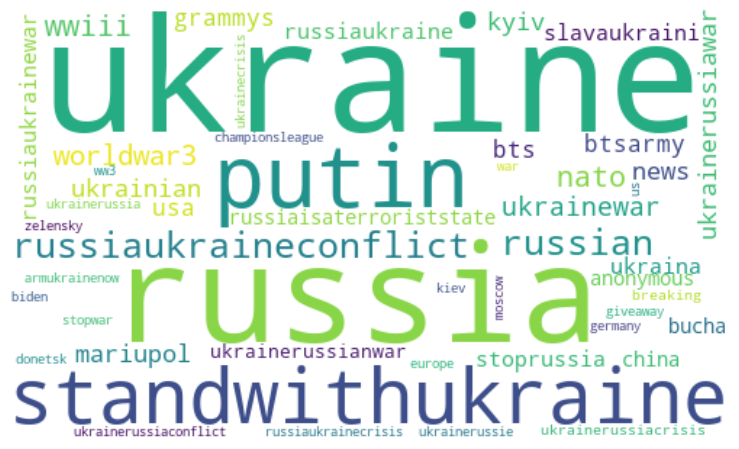

In [85]:
# create wordcloud for the hashtags
tuples = [tuple(x) for x in hashtag_count_neg_df.values]
wordcloud = WordCloud(background_color = 'white', width=500, height=300).generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Positive

In [86]:
# create a bar plot for frequency of hashtags
fig = px.bar(hashtag_count_pos_df, x="count", y="hashtags", title='Commmon hashtags in positive tweets', orientation='h', 
             width=700, height=1000,color='hashtags')
fig.show()

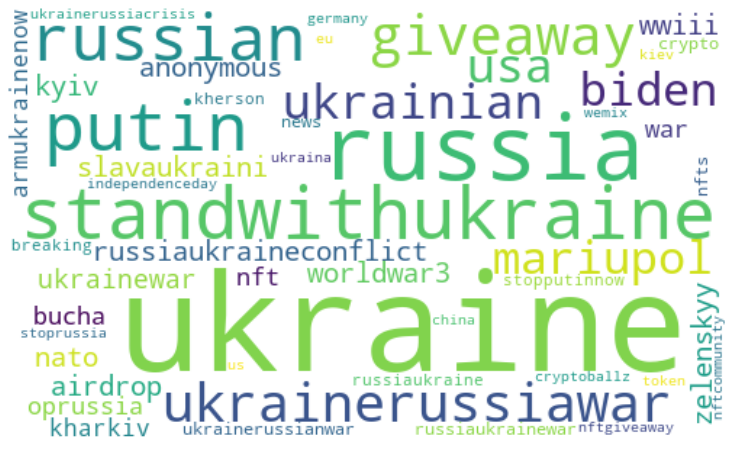

In [87]:
# create wordcloud for the hashtags
tuples = [tuple(x) for x in hashtag_count_pos_df.values]
wordcloud = WordCloud(background_color = 'white', width=500, height=300).generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Vader model**

In [88]:
# concat clean text with label
df2_v = pd.concat([df_clean, vader_tweets['label_pred']], axis = 1)
df2_v.head()

text  label_pred
0  footage airport bombing ivanofrankivsk. #ukrai...           1
1  ukraine mp sophia fedyna tells ground situatio...           1
2  cruise missile fired russian army fell kiev #u...           0
3        spread share, help ukraine #ukraine #russia           1
4  footage airport bombing ivanofrankivsk. #ukrai...           1

In [89]:
# filter df with (-ve) labels
df_neg_v = df2_v[df2_v.label_pred == 0]
df_neg_v = df_neg_v["text"]

# filter df with (+ve) labels
df_pos_v = df2_v[df2_v.label_pred == 1]
df_pos_v = df_pos_v["text"]

Extract the hashtags

In [90]:
# define function
def extract_hashtags(df):
    hashtag = []
    for i in df.index:
      hash = re.findall(r"#(\w+)", df[i])
      hashtag.extend(hash)
    return hashtag

In [91]:
# extract hashtags in (-ve & +ve) tweets into a list
hashtags_neg_list_v = extract_hashtags(df=df_neg_v)
hashtags_pos_list_v = extract_hashtags(df=df_pos_v)

In [92]:
# read the frequency of the most common hashtags for (-ve & +ve) tweets
hashtag_count_neg_v = Counter(hashtags_neg_list_v)
hashtag_count_pos_v = Counter(hashtags_pos_list_v)
hashtag_count_neg_df_v = pd.DataFrame.from_records(hashtag_count_neg_v.most_common(50), columns=['hashtags','count'])
hashtag_count_pos_df_v = pd.DataFrame.from_records(hashtag_count_pos_v.most_common(50), columns=['hashtags','count'])

In [93]:
hashtag_count_neg_df_v

hashtags  count
0                   ukraine  61709
1                    russia  34503
2                     putin  10994
3                   russian   9191
4          standwithukraine   7846
5                  mariupol   6446
6     russiaukraineconflict   5301
7                      nato   5244
8                ukrainewar   4206
9                      kyiv   4131
10                ukrainian   4088
11                      war   4017
12                worldwar3   3548
13                    wwiii   3454
14         ukrainerussiawar   3376
15                    bucha   3247
16                    biden   2910
17        ukrainerussianwar   2555
18            russiaukraine   2498
19                      usa   2432
20         russiaukrainewar   2430
21                  kharkiv   2203
22                     news   2160
23               stoprussia   2108
24             slavaukraini   2019
25                  germany   1989
26                anonymous   1967
27                  ukraina   1819
28  russiaisaterroriststate   1787
29                    china   1620
30      ukrainerussiacrisis   1422
31            armukrainenow   1396
32                       us   1266
33                     kiev   1252
34                 breaking   1243
35               ukrainians   1200
36                      ww3   1136
37                  russias   1125
38         russianwarcrimes   1122
39            buchamassacre   1111
40                    syria   1089
41            ukrainerussia   1086
42                   moscow   1080
43                       eu   1040
44      russiaukrainecrisis    997
45                   tigray    995
46             stopputinnow    964
47                 oprussia    960
48            ukrainerussie    956
49            ukrainecrisis    950

In [94]:
hashtag_count_pos_df_v

hashtags  count
0                   ukraine  67799
1                    russia  30551
2          standwithukraine  15902
3                     putin  12165
4                   russian  10420
5                  giveaway   8840
6     russiaukraineconflict   8734
7          ukrainerussiawar   7875
8                       usa   6772
9                 worldwar3   6176
10                    wwiii   6092
11                ukrainian   5460
12             slavaukraini   5046
13                     nato   4913
14                zelenskyy   4426
15                    biden   4235
16                anonymous   4195
17                  airdrop   4161
18                     kyiv   4124
19                     news   4090
20                      nft   3728
21               ukrainewar   3681
22                  grammys   3244
23                      bts   3240
24                  btsarmy   3223
25                 oprussia   3147
26                 mariupol   2824
27                     nfts   2754
28                   crypto   2644
29                 breaking   2548
30            armukrainenow   2371
31         russiaukrainewar   2345
32                  ukraina   2285
33               stoprussia   2273
34          independenceday   2071
35            russiaukraine   2068
36      ukrainerussiacrisis   2020
37        ukrainerussianwar   1999
38                    bucha   1995
39              nftgiveaway   1825
40          championsleague   1804
41                    china   1752
42                  kherson   1691
43  russiaisaterroriststate   1651
44                  stopwar   1598
45             nftcommunity   1590
46            ukrainerussie   1587
47             stopputinnow   1480
48                    token   1475
49                4thofjuly   1459

Visualizations

Negative

In [95]:
# create a bar plot for frequency of hashtags
fig = px.bar(hashtag_count_neg_df_v, x="count", y="hashtags", title='Commmon hashtags in negative tweets', orientation='h', 
             width=700, height=1000,color='hashtags')
fig.show()

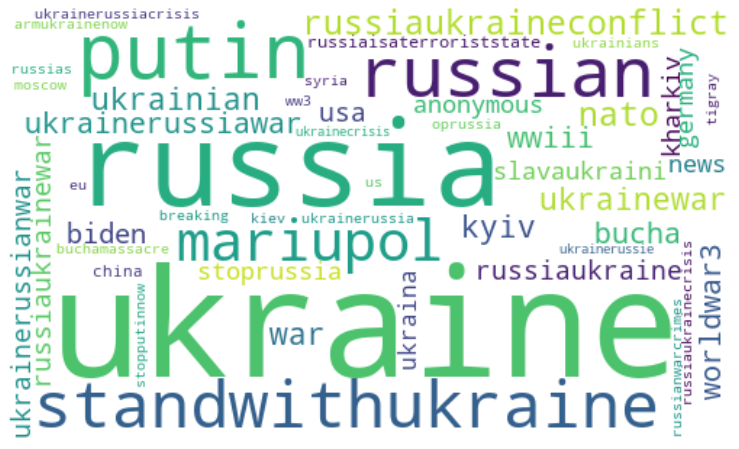

In [96]:
# create wordcloud for the hashtags
tuples = [tuple(x) for x in hashtag_count_neg_df_v.values]
wordcloud = WordCloud(background_color = 'white', width=500, height=300).generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Positive

In [97]:
# create a bar plot for frequency of hashtags
fig = px.bar(hashtag_count_pos_df_v, x="count", y="hashtags", title='Commmon hashtags in positive tweets', orientation='h', 
             width=700, height=1000,color='hashtags')
fig.show()

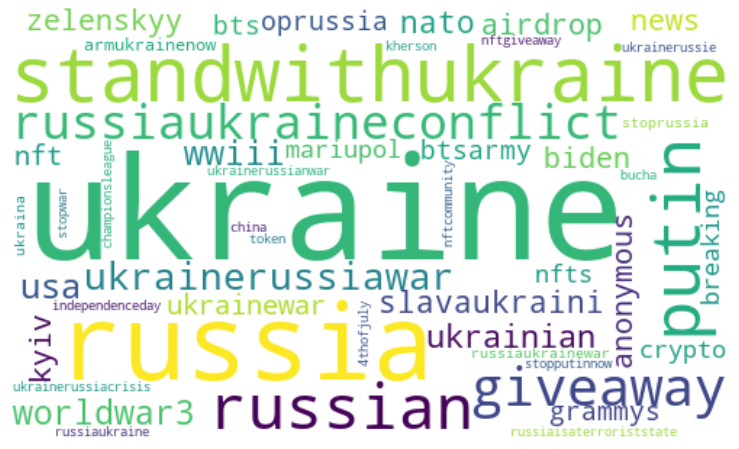

In [98]:
# create wordcloud for the hashtags
tuples = [tuple(x) for x in hashtag_count_pos_df_v.values]
wordcloud = WordCloud(background_color = 'white', width=500, height=300).generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time series of tweets 


In [99]:
df_feb24 = vader_tweets[vader_tweets['tweetcreatedts'].str.contains("2022-02-24")]
df_mar24 = vader_tweets[vader_tweets['tweetcreatedts'].str.contains("2022-03-24")]
df_apr7 = vader_tweets[vader_tweets['tweetcreatedts'].str.contains("2022-04-07")]
df_jul4 = vader_tweets[vader_tweets['tweetcreatedts'].str.contains("2022-07-04")]
df_aug25 = vader_tweets[vader_tweets['tweetcreatedts'].str.contains("2022-08-25")]

In [100]:
df_feb24_neg = df_feb24[df_feb24['label_pred'] == 0]
df_feb24_pos = df_feb24[df_feb24['label_pred'] == 1]

df_mar24_neg = df_mar24[df_mar24['label_pred'] == 0]
df_mar24_pos = df_mar24[df_mar24['label_pred'] == 1]

df_apr7_neg = df_apr7[df_apr7['label_pred'] == 0]
df_apr7_pos = df_apr7[df_apr7['label_pred'] == 1]

df_jul4_neg = df_jul4[df_jul4['label_pred'] == 0]
df_jul4_pos = df_jul4[df_jul4['label_pred'] == 1]

df_aug25_neg = df_aug25[df_aug25['label_pred'] == 0]
df_aug25_pos = df_aug25[df_aug25['label_pred'] == 1]

In [101]:
positive_counts = [df_feb24_pos.shape[0],df_mar24_pos.shape[0],df_apr7_pos.shape[0], df_jul4_pos.shape[0],df_aug25_pos.shape[0]]
negative_counts = [df_feb24_neg.shape[0],df_mar24_neg.shape[0],df_apr7_neg.shape[0], df_jul4_neg.shape[0],df_aug25_neg.shape[0]]
dates = ["2022-04-24","2022-03-24", "2022-04-07","2022-07-04", "2022-08-25"]

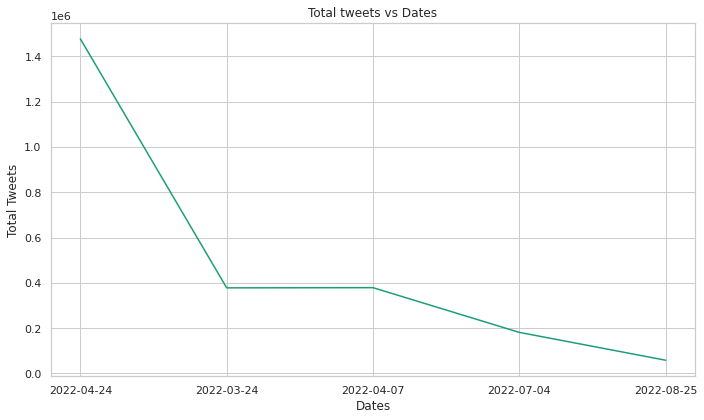

In [102]:
#plotting total tweets 
plt.figure(figsize=(10,6), tight_layout=True)
#plt.plot(lineplot, 'o-', linewidth=2)
#plt.plot(dates, total)
plt.plot(dates, total_tweets_list)
plt.title('Total tweets vs Dates')
plt.xlabel("Dates")
plt.ylabel("Total Tweets")
plt.show()

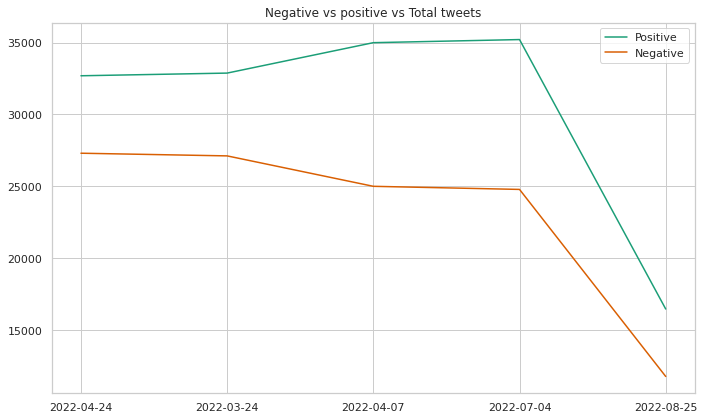

In [103]:
#plotting positive and negative 
plt.figure(figsize=(10,6), tight_layout=True)
#plt.plot(lineplot, 'o-', linewidth=2)
#plt.plot(dates, total)
plt.plot(dates, positive_counts)
plt.plot(dates, negative_counts)
plt.title('Negative vs positive vs Total tweets')
plt.legend(labels=['Positive', 'Negative'])
plt.show()